# Load Data

In [1]:
import pandas as pd

In [2]:
# read data from csv file into pandas dataframe
df = pd.read_csv('merged.csv')
df.head()

Type                       Date  \
0              Person search  2019-12-01T01:48:53+00:00   
1              Person search  2019-12-01T02:17:49+00:00   
2  Person and Vehicle search  2019-12-02T01:24:53+00:00   
3              Person search  2019-12-02T01:47:31+00:00   
4  Person and Vehicle search  2019-12-02T02:09:00+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                           NaN                 NaN  51.516814  -0.081620   
1                           NaN                 NaN  51.513952  -0.085833   
2                           NaN                 NaN  51.520744  -0.089858   
3                           NaN                 NaN        NaN        NaN   
4                           NaN                 NaN  51.517184  -0.076747   

  Gender Age range              Self-defined ethnicity  \
0   Male     25-34  White - Any other White background   
1   Male   over 34  White - Any other White background   
2   Male     18-24     Other ethnic group - Not stated   
3   Male   over 34     Other ethnic group - Not stated   
4   Male     18-24     Other ethnic group - Not stated   

  Officer-defined ethnicity  \
0                     White   
1                     Other   
2                     Asian   
3                     Black   
4                     Asian   

                                         Legislation   Object of search  \
0  Police and Criminal Evidence Act 1984 (section 1)  Offensive weapons   
1  Police and Criminal Evidence Act 1984 (section 1)  Offensive weapons   
2              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   
3              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   
4              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   

                        Outcome  Outcome linked to object of search  \
0  A no further action disposal                               False   
1                        Arrest                                True   
2  A no further action disposal                               False   
3  A no further action disposal                                True   
4  A no further action disposal                               False   

   Removal of more than just outer clothing  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8044 entries, 0 to 8043
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      8044 non-null   object 
 1   Date                                      8044 non-null   object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  6299 non-null   float64
 5   Longitude                                 6299 non-null   float64
 6   Gender                                    8037 non-null   object 
 7   Age range                                 7410 non-null   object 
 8   Self-defined ethnicity                    7589 non-null   object 
 9   Officer-defined ethnicity                 7586 non-null   object 
 10  Legislation                         

In [4]:
import warnings
warnings.filterwarnings('ignore')

***
## Data pre processing

Data pre processing dropping sensitive data and row with empty values that is critical to use

In [5]:
# keep only Outcome linked to object of search is True
df = df[df['Outcome linked to object of search'] == True]

The above line of code filters the DataFrame 'df' to keep only rows where the 'Outcome linked to object of search' column is True. The purpse of this action is to focus the instances where the outcome of the search is directly related to the object of search, to avoid false inspection relate to the object of search.

In [6]:
# drop the columns that are not needed becuase now it only contains True values for Outcome linked to object of search
df.drop(['Outcome linked to object of search'], axis=1, inplace=True)

In [7]:
# drop columns that are completely empty
df.drop(['Part of a policing operation','Policing operation','Legislation'], axis=1, inplace=True)

In [8]:
# drop ethnicity related columns as it is sensitive data
df.drop(['Self-defined ethnicity'], axis=1, inplace=True)
df.drop(['Officer-defined ethnicity'], axis=1, inplace=True)

In [9]:
# remove latitudes and longitudes rows that are NaN
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [10]:
# focus on drug related searches only 
df = df[df['Object of search'] == 'Controlled drugs']
# drop object of search column as it is not needed anymore as it only contains Controlled drugs
df.drop(['Object of search'], axis=1, inplace=True)

In [11]:
import folium
from IPython.display import display
loc = df.dropna(subset=["Latitude", "Longitude"])
map_ = folium.Map(location=[loc["Latitude"].mean(), loc["Longitude"].mean()], zoom_start=7, min_zoom=7, max_zoom=7)
for lat, lon in zip(loc["Latitude"], loc["Longitude"]):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_)
display(map_)

In [12]:
# remove locations that are not in London
df = df[df.Latitude <= 52]
df.head()

Type                       Date   Latitude  Longitude Gender  \
10  Person search  2019-12-03T09:48:08+00:00  51.517431  -0.082458   Male   
12  Person search  2019-12-04T02:53:26+00:00  51.516814  -0.081620   Male   
13  Person search  2019-12-04T03:15:57+00:00  51.513114  -0.086272   Male   
14  Person search  2019-12-04T06:36:19+00:00  51.518060  -0.110683   Male   
16  Person search  2019-12-04T12:37:18+00:00  51.517680  -0.078484   Male   

   Age range                       Outcome  \
10     18-24                        Arrest   
12     25-34  A no further action disposal   
13   over 34                        Arrest   
14     25-34   Penalty Notice for Disorder   
16     18-24      Khat or Cannabis warning   

    Removal of more than just outer clothing  
10                                     False  
12                                     False  
13                                     False  
14                                     False  
16                                     False

In [13]:
# print the map again to see the difference
loc = df.dropna(subset=["Latitude", "Longitude"])
map_ = folium.Map(location=[loc["Latitude"].mean(), loc["Longitude"].mean()], zoom_start=15, min_zoom=15, max_zoom=15)
for lat, lon in zip(loc["Latitude"], loc["Longitude"]):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_)
display(map_)

In [14]:
# remove Gender columns from the dataframe
df.drop(['Gender'], axis=1, inplace=True)

In [15]:
# drop sanction outcome becuase police sanction decison is not a consideration as all searches are true for Outcome linked to object of search
df.drop(['Outcome'], axis=1, inplace=True)

In [16]:
# drop age range becuase it might create bias to certain age groups
df.drop(['Age range'], axis=1, inplace=True)

In [17]:
# Convert the boolean column to an integer column
df['Removal of more than just outer clothing'] = df['Removal of more than just outer clothing'].astype(int)

In [18]:
df

Type                       Date   Latitude  \
10                Person search  2019-12-03T09:48:08+00:00  51.517431   
12                Person search  2019-12-04T02:53:26+00:00  51.516814   
13                Person search  2019-12-04T03:15:57+00:00  51.513114   
14                Person search  2019-12-04T06:36:19+00:00  51.518060   
16                Person search  2019-12-04T12:37:18+00:00  51.517680   
...                         ...                        ...        ...   
7991              Person search  2022-11-23T19:07:30+00:00  51.519045   
7997  Person and Vehicle search  2022-11-24T13:16:19+00:00  51.519045   
8002              Person search  2022-11-24T16:01:19+00:00  51.513631   
8020  Person and Vehicle search  2022-11-26T21:42:06+00:00  51.512770   
8022              Person search  2022-11-27T00:46:46+00:00  51.518461   

      Longitude  Removal of more than just outer clothing  
10    -0.082458                                         0  
12    -0.081620                                         0  
13    -0.086272                                         0  
14    -0.110683                                         0  
16    -0.078484                                         0  
...         ...                                       ...  
7991  -0.097078                                         0  
7997  -0.097078                                         0  
8002  -0.086019                                         0  
8020  -0.118367                                         0  
8022  -0.097103                                         0  

[1333 rows x 5 columns]

<Axes: >

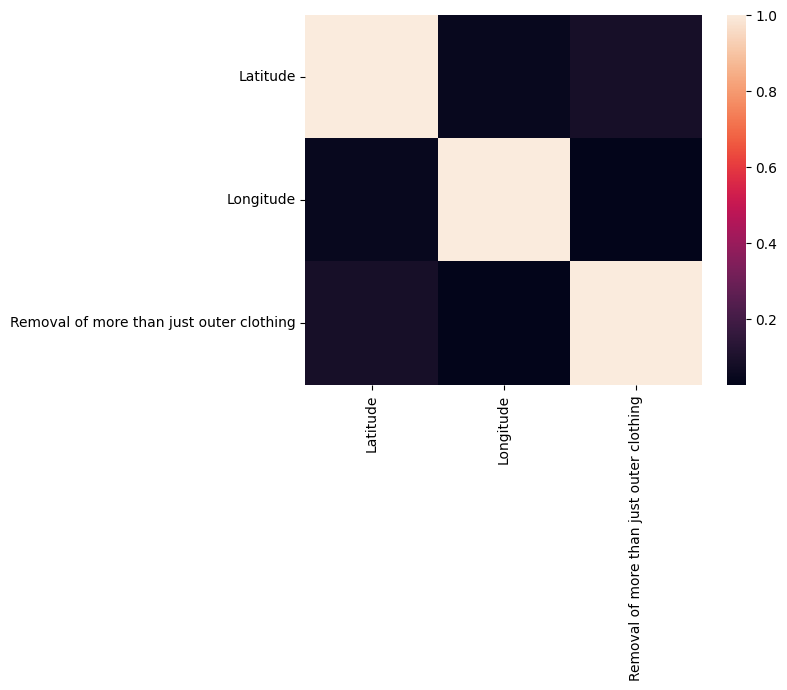

In [19]:
#  calculate the correlation matrix
corr = df.corr()
# plot the heatmap
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

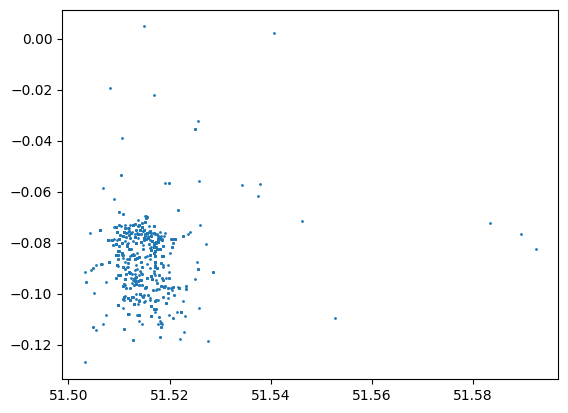

In [20]:
# plot a distribution in x = latitude and y = longitude to see the distribution of the data
import matplotlib.pyplot as plt
plt.scatter(df['Latitude'], df['Longitude'], s=1)
plt.show()

***
# Split data into train and test

In [21]:
train_size =int(len(df)*0.70) 
test_size = len(df) - train_size

In [22]:
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [23]:
# rest the index of the dataframes
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

### Encode Type

In [24]:
# onehot encode the type
from sklearn.preprocessing import OneHotEncoder
type_onehot = OneHotEncoder(handle_unknown='ignore' , sparse=False) # create the encoder
type_onehot.fit(train_data[['Type']]) # fit the encoder to the train data

# transform the train and test data
train_type = type_onehot.transform(train_data[['Type']])
test_type = type_onehot.transform(test_data[['Type']])

# create a dataframe from the encoded data
train_type = pd.DataFrame(train_type, columns=type_onehot.get_feature_names_out(['Type']))
test_type = pd.DataFrame(test_type, columns=type_onehot.get_feature_names_out(['Type']))

# concat the encoded data to the train and test data
train_data = pd.concat([train_data, train_type], axis=1)
test_data = pd.concat([test_data, test_type], axis=1)

# drop the type column from the train and test data
train_data.drop(['Type'], axis=1, inplace=True)
test_data.drop(['Type'], axis=1, inplace=True)

### Categorise the time, in every 8 hours, 3 shifts for 24 hours police work

In [25]:
# Extract the hour component from the "Date" column and create a new "Time" column
train_data['Time'] = pd.to_datetime(train_data['Date']).dt.hour

# Add 1 to all values in the "Time" column to make the first hour 1 instead of 0
train_data['Time'] = train_data['Time'] + 1

# Create 3-hour intervals for the "Time" column and add it to new columns "Shift1", "Shift2", "Shift3"
shifts = pd.get_dummies(pd.cut(train_data['Time'], bins=[0, 8, 16, 24], labels=['Shift1', 'Shift2', 'Shift3']))
train_data[shifts.columns] = shifts

# Drop the "Time" column
train_data.drop(['Time'], axis=1, inplace=True)

In [26]:
# Extract the hour component from the "Date" column and create a new "Time" column
test_data['Time'] = pd.to_datetime(test_data['Date']).dt.hour

# Add 1 to all values in the "Time" column to make the first hour 1 instead of 0
test_data['Time'] = test_data['Time'] + 1

# Create 3-hour intervals for the "Time" column and add it to new columns "Shift1", "Shift2", "Shift3"
shifts = pd.get_dummies(pd.cut(test_data['Time'], bins=[0, 8, 16, 24], labels=['Shift1', 'Shift2', 'Shift3']))
test_data[shifts.columns] = shifts

# Drop the "Time" column
test_data.drop(['Time'], axis=1, inplace=True)

In [27]:
# check shape
train_data.shape, test_data.shape

((933, 9), (400, 9))

In [28]:
# extract the week day of the Date column and add it to a new column called week Day
train_data['Week Day'] = pd.to_datetime(train_data['Date']).dt.dayofweek

# extract the month of the Date column and add it to a new column called Month
train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month

In [29]:
test_data['Week Day'] = pd.to_datetime(test_data['Date']).dt.dayofweek
test_data['Month'] = pd.to_datetime(test_data['Date']).dt.month

In [30]:
# increment all values in the Week Day column by 1 to make the first day 1 instead of 0
train_data['Week Day'] = train_data['Week Day'] + 1

In [31]:
test_data['Week Day'] = test_data['Week Day'] + 1

In [32]:
# show Week Day unique values counts
train_data['Week Day'].value_counts()

5    168
4    163
3    139
6    129
2    120
7    108
1    106
Name: Week Day, dtype: int64

In [33]:
test_data['Week Day'].value_counts()

5    82
4    66
6    64
3    64
1    47
2    42
7    35
Name: Week Day, dtype: int64

In [34]:
# show Month unique values counts
train_data['Month'].value_counts()

7     134
12     88
3      83
9      79
6      77
4      74
11     74
10     72
8      70
5      65
1      64
2      53
Name: Month, dtype: int64

In [35]:
test_data['Month'].value_counts()

5     48
4     42
11    40
8     39
1     34
12    33
7     33
3     30
2     26
10    26
6     25
9     24
Name: Month, dtype: int64

In [36]:
# One-hot encode the 'Week Day', 'Month', 'Day',columns and create new DataFrames
weekday_onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
weekday_onehot.fit(train_data[['Week Day']])
train_weekday = weekday_onehot.transform(train_data[['Week Day']])
test_weekday = weekday_onehot.transform(test_data[['Week Day']])
train_weekday = pd.DataFrame(train_weekday, columns=weekday_onehot.get_feature_names_out(['Week Day']))
test_weekday = pd.DataFrame(test_weekday, columns=weekday_onehot.get_feature_names_out(['Week Day']))

# Concatenate the one-hot encoded columns to the original DataFrame
train_data = pd.concat([train_data, train_weekday], axis=1)
test_data = pd.concat([test_data, test_weekday], axis=1)

# Drop the original 'Week Day' column
train_data.drop(['Week Day'], axis=1, inplace=True)
test_data.drop(['Week Day'], axis=1, inplace=True)


In [37]:
month_onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
month_onehot.fit(train_data[['Month']])
train_month = month_onehot.transform(train_data[['Month']])
test_month = month_onehot.transform(test_data[['Month']])
train_month = pd.DataFrame(train_month, columns=month_onehot.get_feature_names_out(['Month']))
test_month = pd.DataFrame(test_month, columns=month_onehot.get_feature_names_out(['Month']))

# Concatenate the one-hot encoded columns to the original DataFrame
train_data = pd.concat([train_data, train_month], axis=1)
test_data = pd.concat([test_data, test_month], axis=1)

# Drop the original 'Month' column
train_data.drop(['Month'], axis=1, inplace=True)
test_data.drop(['Month'], axis=1, inplace=True)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      933 non-null    object 
 1   Latitude                                  933 non-null    float64
 2   Longitude                                 933 non-null    float64
 3   Removal of more than just outer clothing  933 non-null    int32  
 4   Type_Person and Vehicle search            933 non-null    float64
 5   Type_Person search                        933 non-null    float64
 6   Shift1                                    933 non-null    uint8  
 7   Shift2                                    933 non-null    uint8  
 8   Shift3                                    933 non-null    uint8  
 9   Week Day_1                                933 non-null    float64
 10  Week Day_2                            

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      400 non-null    object 
 1   Latitude                                  400 non-null    float64
 2   Longitude                                 400 non-null    float64
 3   Removal of more than just outer clothing  400 non-null    int32  
 4   Type_Person and Vehicle search            400 non-null    float64
 5   Type_Person search                        400 non-null    float64
 6   Shift1                                    400 non-null    uint8  
 7   Shift2                                    400 non-null    uint8  
 8   Shift3                                    400 non-null    uint8  
 9   Week Day_1                                400 non-null    float64
 10  Week Day_2                            

In [40]:
# show head of the data
train_data.head()

Date   Latitude  Longitude  \
0  2019-12-03T09:48:08+00:00  51.517431  -0.082458   
1  2019-12-04T02:53:26+00:00  51.516814  -0.081620   
2  2019-12-04T03:15:57+00:00  51.513114  -0.086272   
3  2019-12-04T06:36:19+00:00  51.518060  -0.110683   
4  2019-12-04T12:37:18+00:00  51.517680  -0.078484   

   Removal of more than just outer clothing  Type_Person and Vehicle search  \
0                                         0                             0.0   
1                                         0                             0.0   
2                                         0                             0.0   
3                                         0                             0.0   
4                                         0                             0.0   

   Type_Person search  Shift1  Shift2  Shift3  Week Day_1  ...  Month_3  \
0                 1.0       0       1       0         0.0  ...      0.0   
1                 1.0       1       0       0         0.0  ...      0.0   
2                 1.0       1       0       0         0.0  ...      0.0   
3                 1.0       1       0       0         0.0  ...      0.0   
4                 1.0       0       1       0         0.0  ...      0.0   

   Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0       0.0       0.0   

   Month_12  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  

[5 rows x 28 columns]

In [41]:
test_data.head()

Date   Latitude  Longitude  \
0  2021-11-21T03:41:39+00:00  51.517534  -0.095960   
1  2021-11-22T01:31:19+00:00  51.518864  -0.097562   
2  2021-11-22T02:46:47+00:00  51.509930  -0.068161   
3  2021-11-26T06:32:54+00:00  51.516814  -0.081620   
4  2021-11-27T01:25:50+00:00  51.516814  -0.081620   

   Removal of more than just outer clothing  Type_Person and Vehicle search  \
0                                         0                             0.0   
1                                         0                             1.0   
2                                         0                             0.0   
3                                         0                             0.0   
4                                         0                             0.0   

   Type_Person search  Shift1  Shift2  Shift3  Week Day_1  ...  Month_3  \
0                 1.0       1       0       0         0.0  ...      0.0   
1                 0.0       1       0       0         1.0  ...      0.0   
2                 1.0       1       0       0         1.0  ...      0.0   
3                 1.0       1       0       0         0.0  ...      0.0   
4                 1.0       1       0       0         0.0  ...      0.0   

   Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  Month_11  \
0      0.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0   
1      0.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0   
2      0.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0   
3      0.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0   
4      0.0      0.0      0.0      0.0      0.0      0.0       0.0       1.0   

   Month_12  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 28 columns]

In [42]:
# drop the Date column
train_data.drop(['Date'], axis=1, inplace=True)
test_data.drop(['Date'], axis=1, inplace=True)

In [43]:
# conver all the type to float 64
train_data = train_data.astype('float64')

In [44]:
test_data = test_data.astype('float64')

<Axes: >

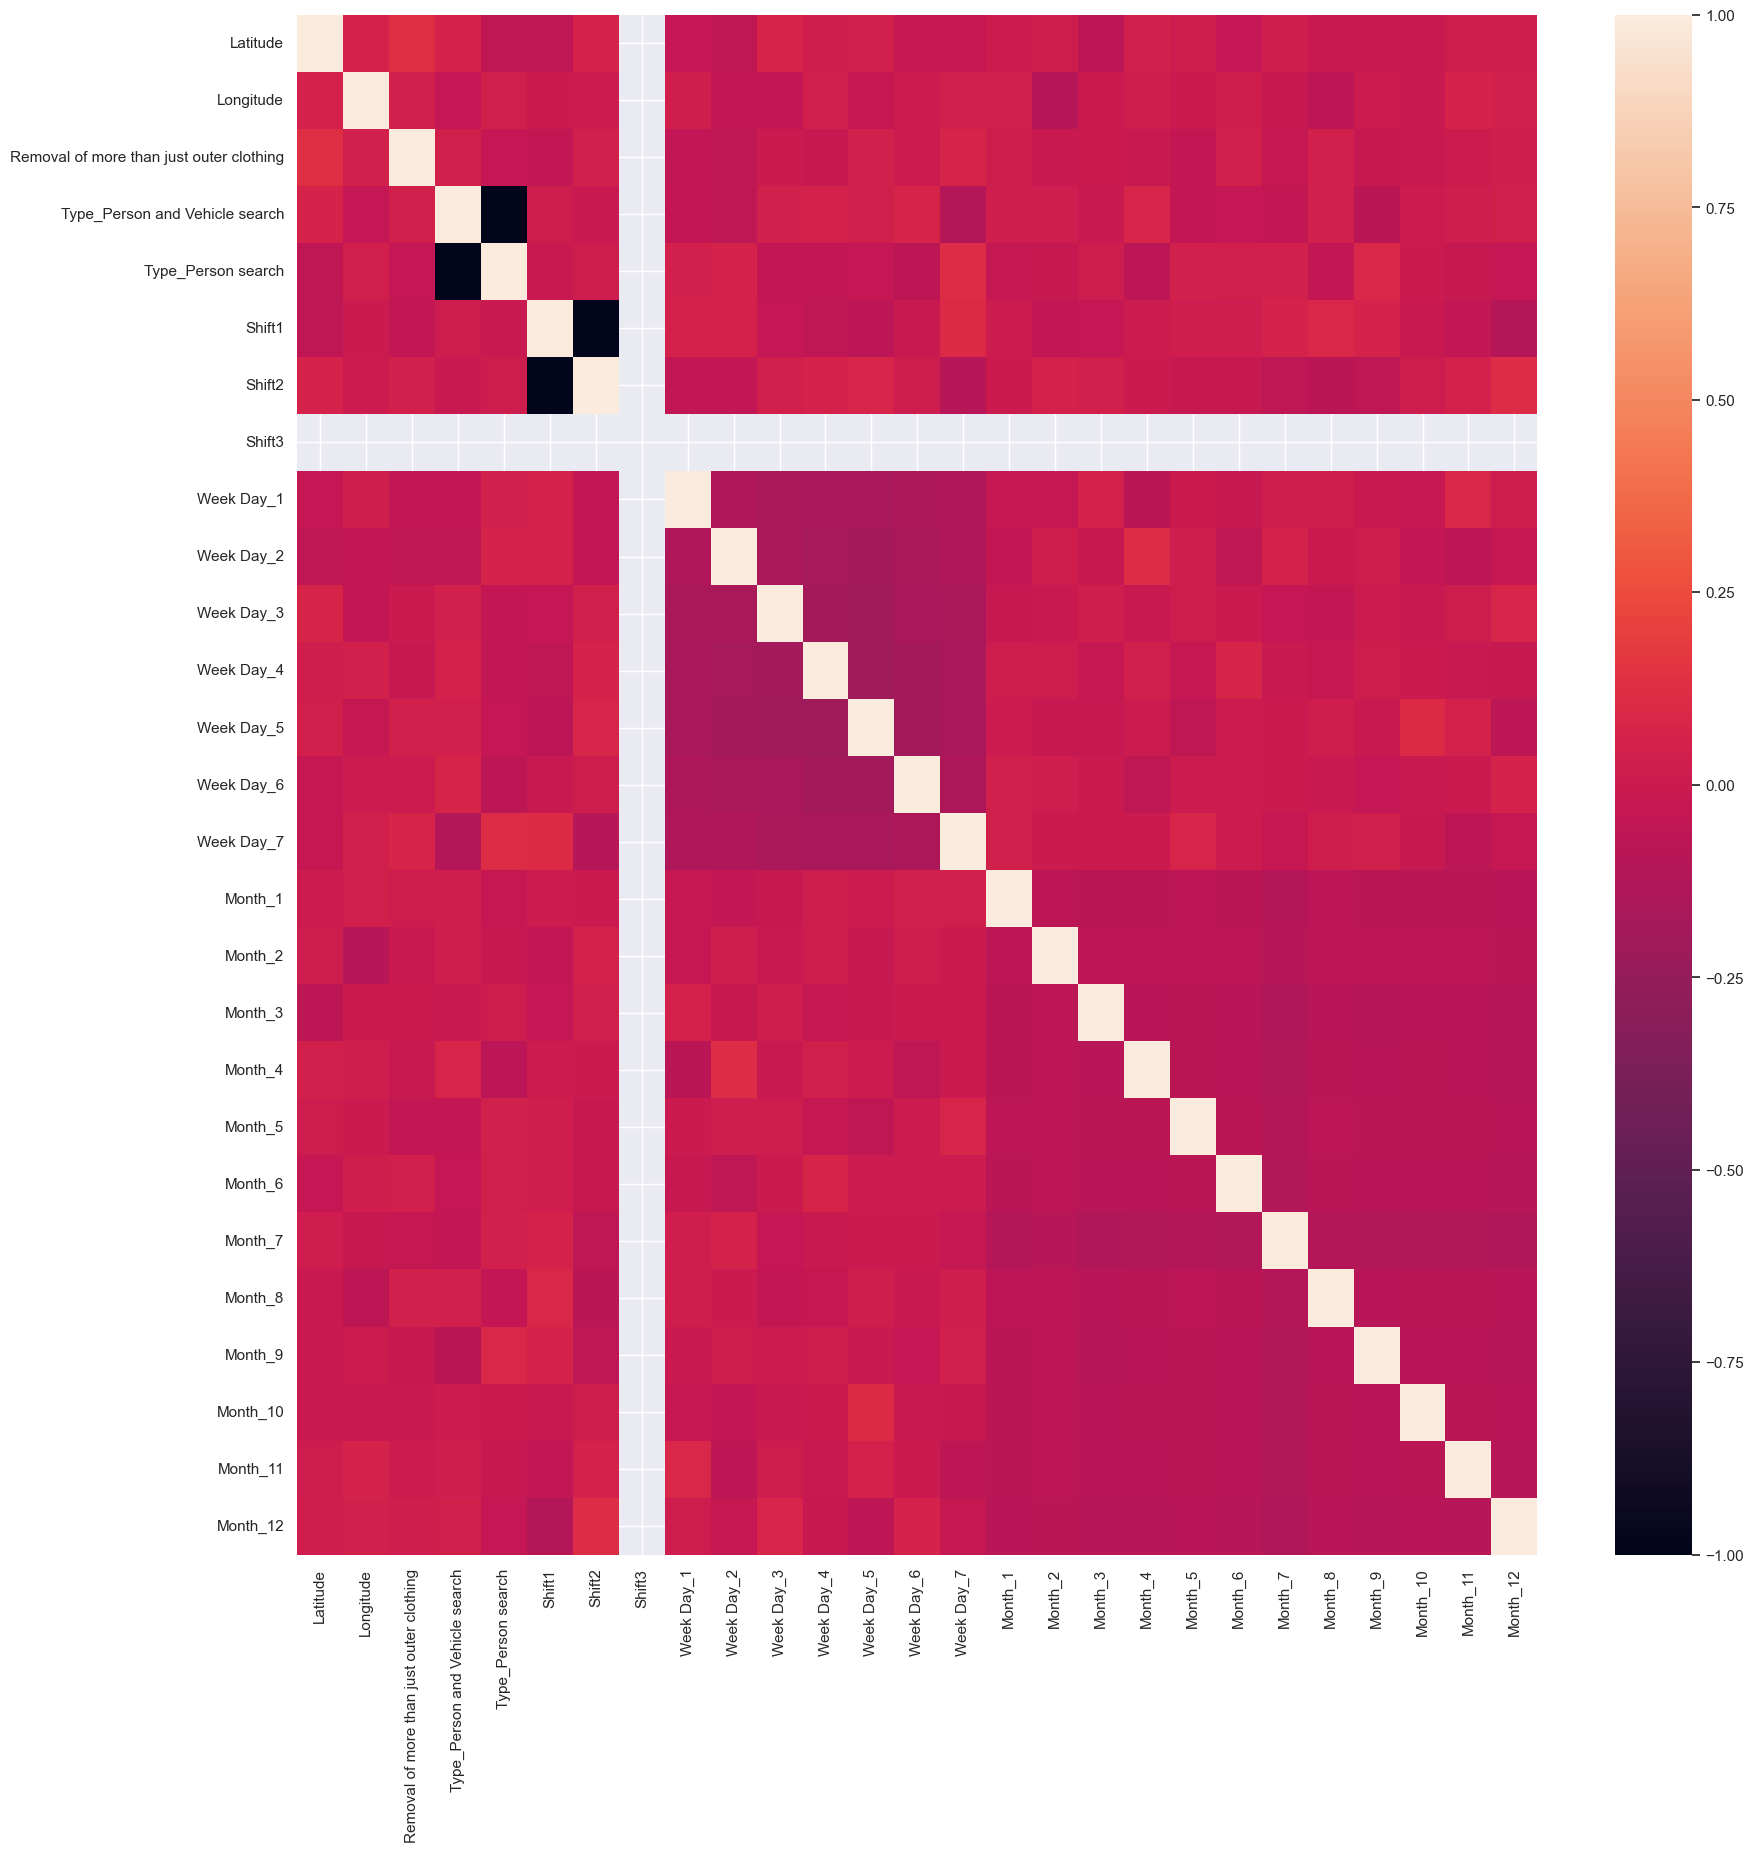

In [45]:
# show correlation matrix
corr = train_data.corr()
# plot the heatmap with larger size
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes: >

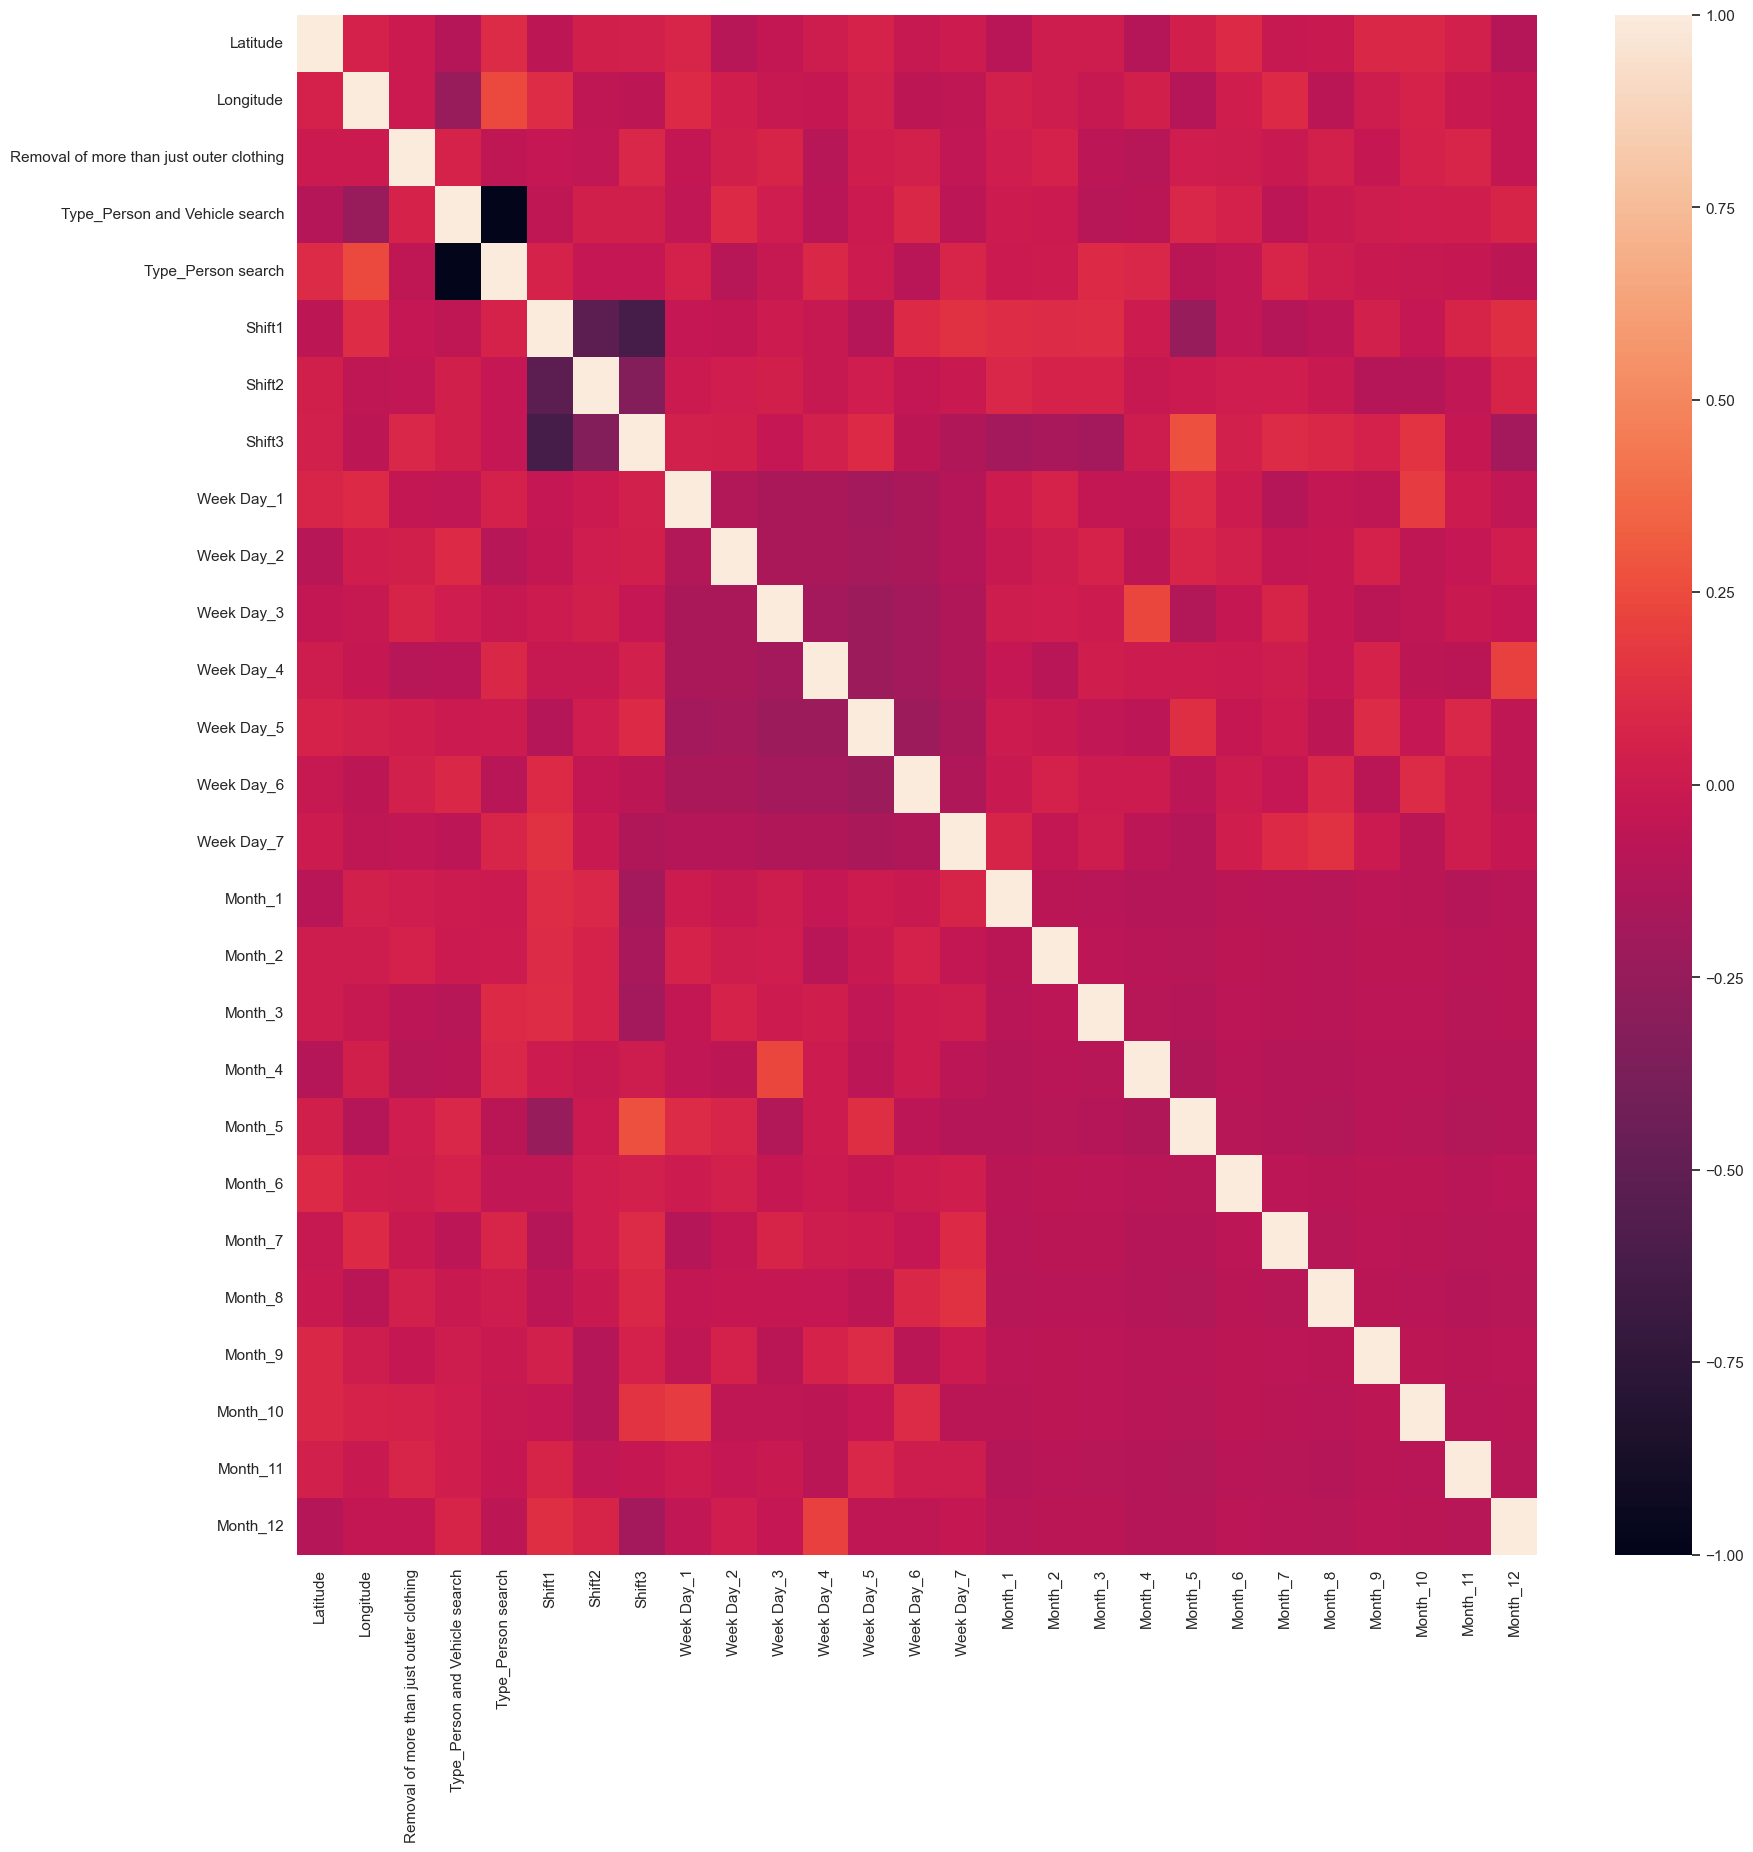

In [46]:
# show correlation matrix
corr = test_data.corr()
# plot the heatmap with larger size
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

***
# Define X and y

Define the target and lable for the model, X is the features and y is the target, also becuase I want the model to predict the future, I will need to shift the y by 1 row, so the model will predict the next row as their target. Then drop the tails to ensure the length of X and y are the same.

In [47]:
x_train = train_data
y_train_shift = train_data[['Shift1', 'Shift2', 'Shift3']].shift(-1) 
y_train_location = train_data[['Latitude', 'Longitude']].shift(-1)
# drop the last row
x_train = x_train[:-1]
y_train_shift = y_train_shift[:-1]
y_train_location = y_train_location[:-1]
# print the shape of the data
x_train.shape, y_train_shift.shape, y_train_location.shape

((932, 27), (932, 3), (932, 2))

In [48]:
x_test = test_data
y_test_shift = test_data[['Shift1', 'Shift2', 'Shift3']].shift(-1)
y_test_location = test_data[['Latitude', 'Longitude']].shift(-1)
# drop the last row
x_test = x_test[:-1]
y_test_shift = y_test_shift[:-1]
y_test_location = y_test_location[:-1]
# print the shape of the data
x_test.shape, y_test_shift.shape, y_test_location.shape

((399, 27), (399, 3), (399, 2))

## Shuffle the data

In [49]:
# import numpy as np

# train_indices = np.arange(x_train.shape[0])
# np.random.shuffle(train_indices)
# x_train = x_train.iloc[train_indices]
# y_train_shift = y_train_shift.iloc[train_indices]
# y_train_location = y_train_location.iloc[train_indices]

# test_indices = np.arange(x_test.shape[0])
# np.random.shuffle(test_indices)
# x_test = x_test.iloc[test_indices]
# y_test_shift = y_test_shift.iloc[test_indices]
# y_test_location = y_test_location.iloc[test_indices]

## Scale the data using MinMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler
# scale the data
scaler = MinMaxScaler()
x_train_original = x_train.copy()
x_test_original = x_test.copy()
x_train = scaler.fit_transform(x_train) # fit and transform
x_test = scaler.transform(x_test) # only transform

***
# Create the model

## Random Forest

### Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [256, 1024, 4096,8192],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2'],
}

In [150]:
# Create the Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Create the Grid Search object
grid_search = GridSearchCV(rf,  # the model
                           param_grid=param_grid,  # the parameter grid
                           cv=5, # number of folds cross validation
                           verbose= 0 # verbosity level (0 = no output)
                           )

In [151]:
# Fit the Grid Search object to the training data
grid_search.fit(x_train, y_train_location)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [256, 1024, 4096, 8192]})

In [152]:
# get the best parameters and best score
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10, 'max_features': 'log2', 'n_estimators': 256},
 -0.10997062699447906)

In [153]:
# ({'max_depth': 10, 'max_features': 'log2', 'n_estimators': 256},
# create a check model to verify the accuracy of the model is true increase number of max_depth 10 to 20
rf_location_check_result = pd.DataFrame(columns=['max_depth', 'neg_mean_squared_error','neg_mean_absolute_error' ])
for i in range(10, 21):
    rf_check = RandomForestRegressor(max_depth=i, 
                                     max_features='log2',
                                     n_estimators=256,
                                     random_state=42
                                    )
    rf_check.fit(x_train, y_train_location)
    y_pred_location_check = rf_check.predict(x_test)
    
    # calculate scores
    mse = mean_squared_error(y_test_location, y_pred_location_check)
    mae = mean_absolute_error(y_test_location, y_pred_location_check)

    # append the scores to the dataframe
    rf_location_check_result = pd.concat([rf_location_check_result, pd.DataFrame([[i, mse, mae]], columns=['max_depth', 
                                                                                                           'neg_mean_squared_error',
                                                                                                           'neg_mean_absolute_error' ])], axis=0)
    
rf_location_check_result

max_depth  neg_mean_squared_error  neg_mean_absolute_error
0        10                0.000071                 0.005972
0        11                0.000071                 0.005989
0        12                0.000072                 0.006016
0        13                0.000073                 0.006035
0        14                0.000073                 0.006081
0        15                0.000074                 0.006123
0        16                0.000074                 0.006126
0        17                0.000074                 0.006108
0        18                0.000076                 0.006173
0        19                0.000076                 0.006199
0        20                0.000076                 0.006175

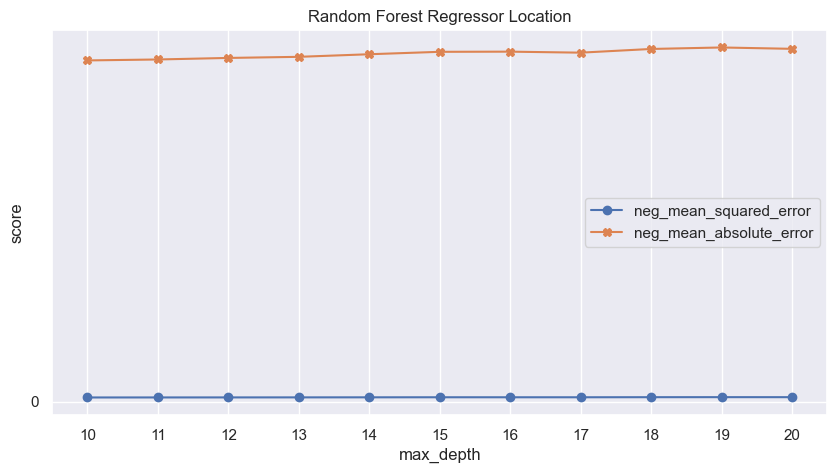

In [154]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(rf_location_check_result['max_depth'], rf_location_check_result['neg_mean_squared_error'], label='neg_mean_squared_error',marker='o')
plt.plot(rf_location_check_result['max_depth'], rf_location_check_result['neg_mean_absolute_error'], label='neg_mean_absolute_error',marker='X')
plt.legend(['neg_mean_squared_error', 'neg_mean_absolute_error'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Random Forest Regressor Location')
plt.xticks(range(10,21))
plt.yticks(range(0, 1))
plt.show()

Make a prediction on the test data

In [155]:
# extract the best model from the grid search
rf_regression_best_model = grid_search.best_estimator_

In [156]:
# Make predictions on the test set using the best model
rf_y_train_location = rf_regression_best_model.predict(x_train_original)

In [157]:
rf_y_test_location = rf_regression_best_model.predict(x_test)

In [158]:
# Evaluate the model using the mean squared error metric
regression_mse = mean_squared_error(y_test_location, rf_y_test_location)
print(f"Location regression mean squared error: {regression_mse}")

regression_mae = mean_absolute_error(y_test_location, rf_y_test_location)
print(f"Location regression mean absolute error: {regression_mae}")

Location regression mean squared error: 7.089964574863813e-05
Location regression mean absolute error: 0.005972484691665933


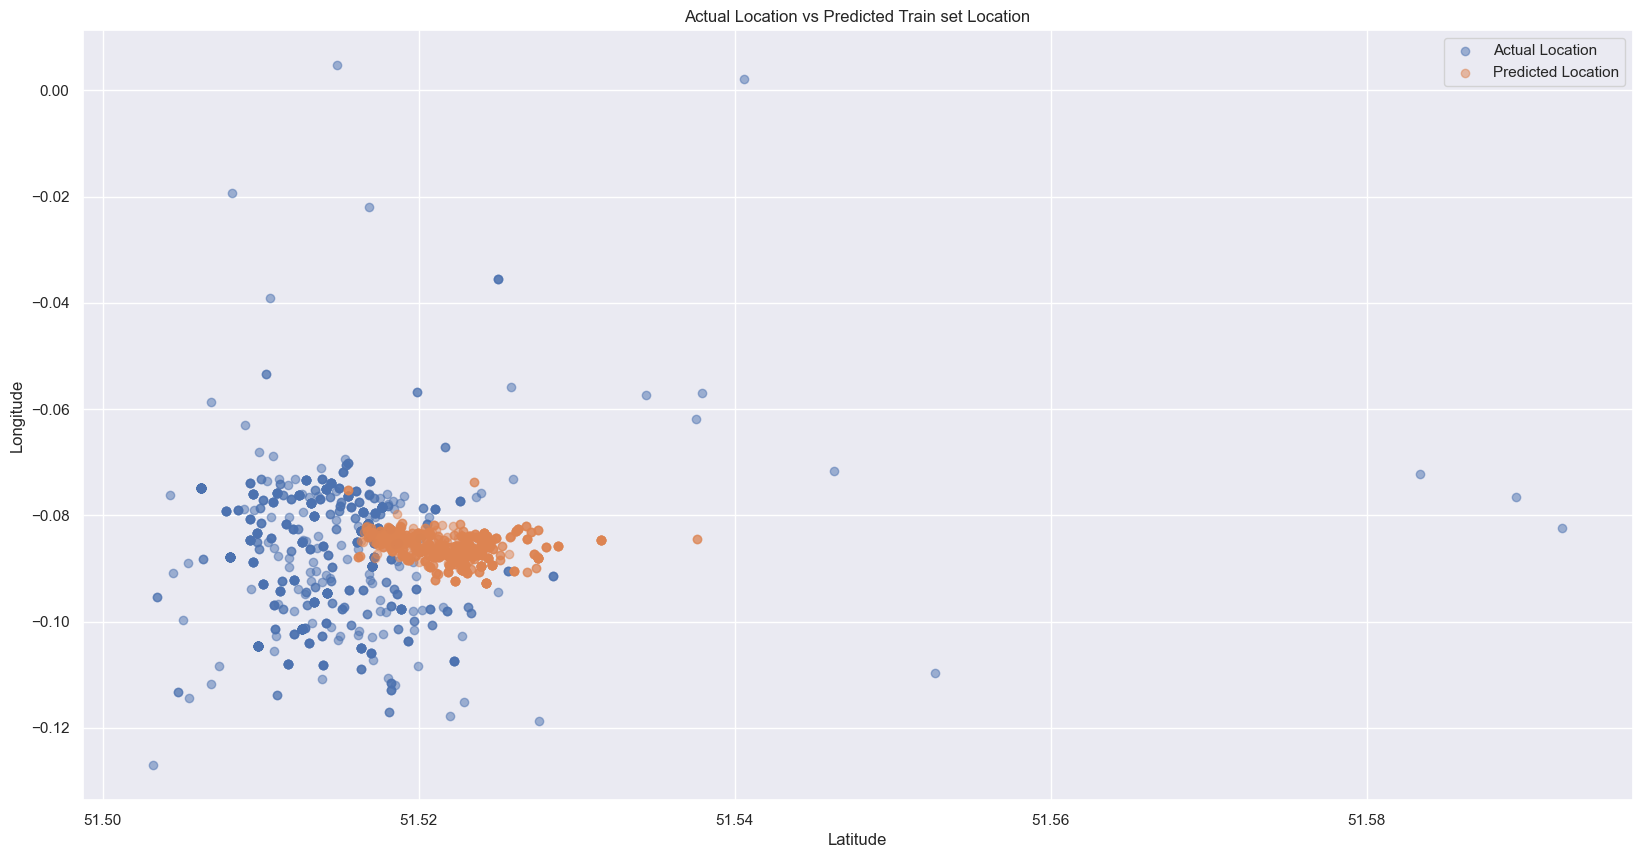

In [159]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(rf_y_train_location[:,0], rf_y_train_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

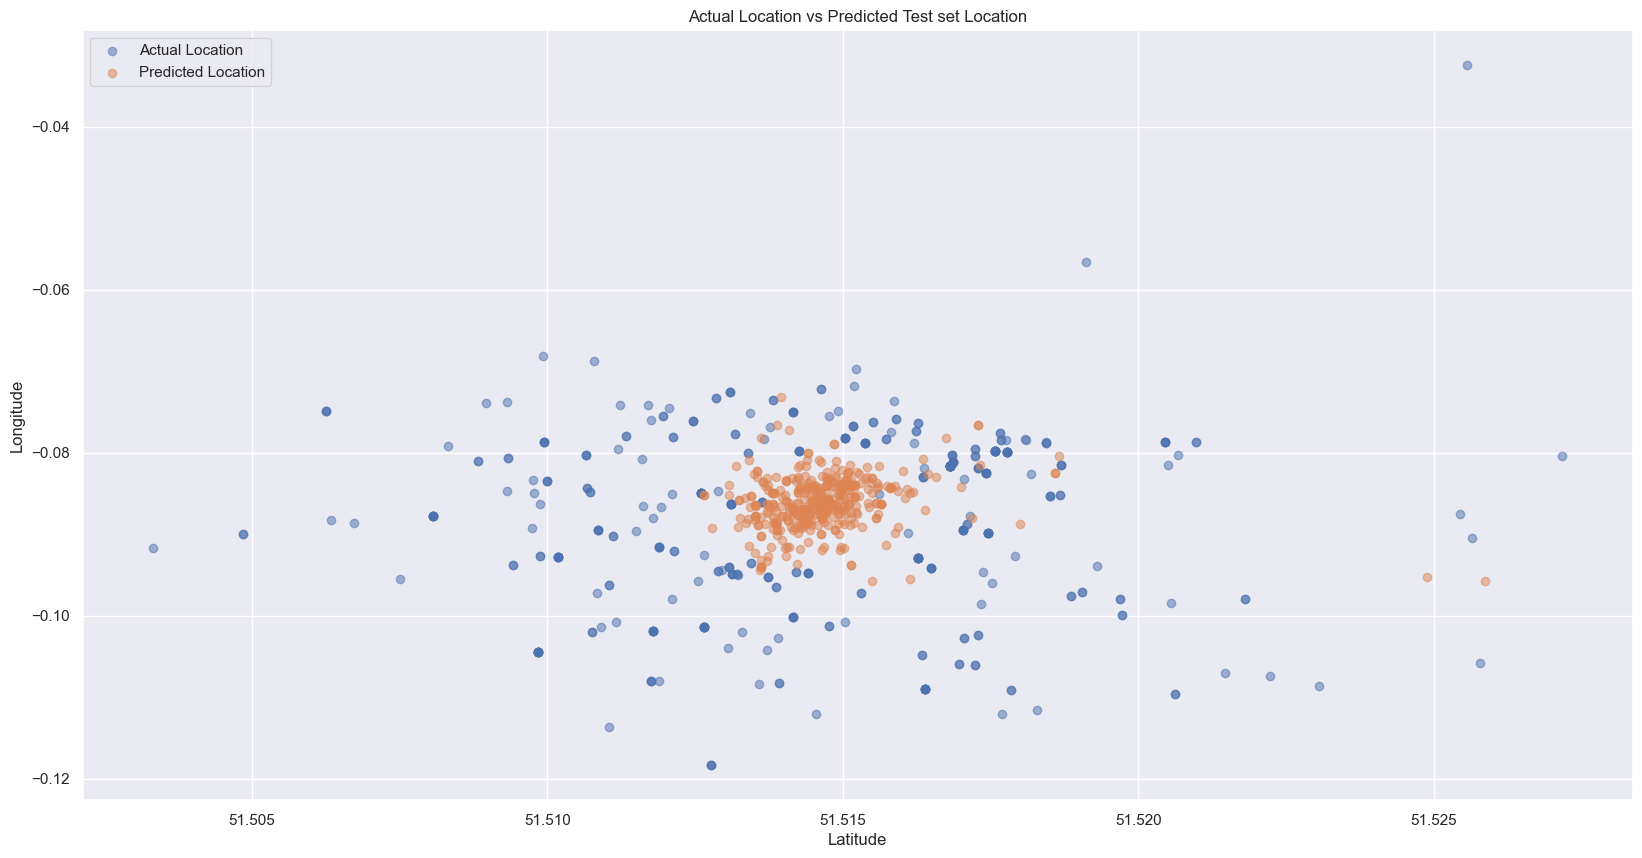

In [160]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure
plt.scatter(x_test_original['Latitude'], x_test_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual test location
plt.scatter(rf_y_test_location[:,0], rf_y_test_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend() 
plt.title('Actual Location vs Predicted Test set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

##### Error Distances

In [161]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
distance = []
for i in range(len(rf_y_test_location)):
    distance.append(geodesic((rf_y_test_location[i][0], rf_y_test_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)


# convert distance to pd
rf_distance = pd.DataFrame(distance, columns=['Distance'])

rf_distance.describe()

Distance
count   399.000000
mean    760.198950
std     459.443413
min      19.512225
25%     466.280127
50%     638.412089
75%     977.229064
max    4034.566695

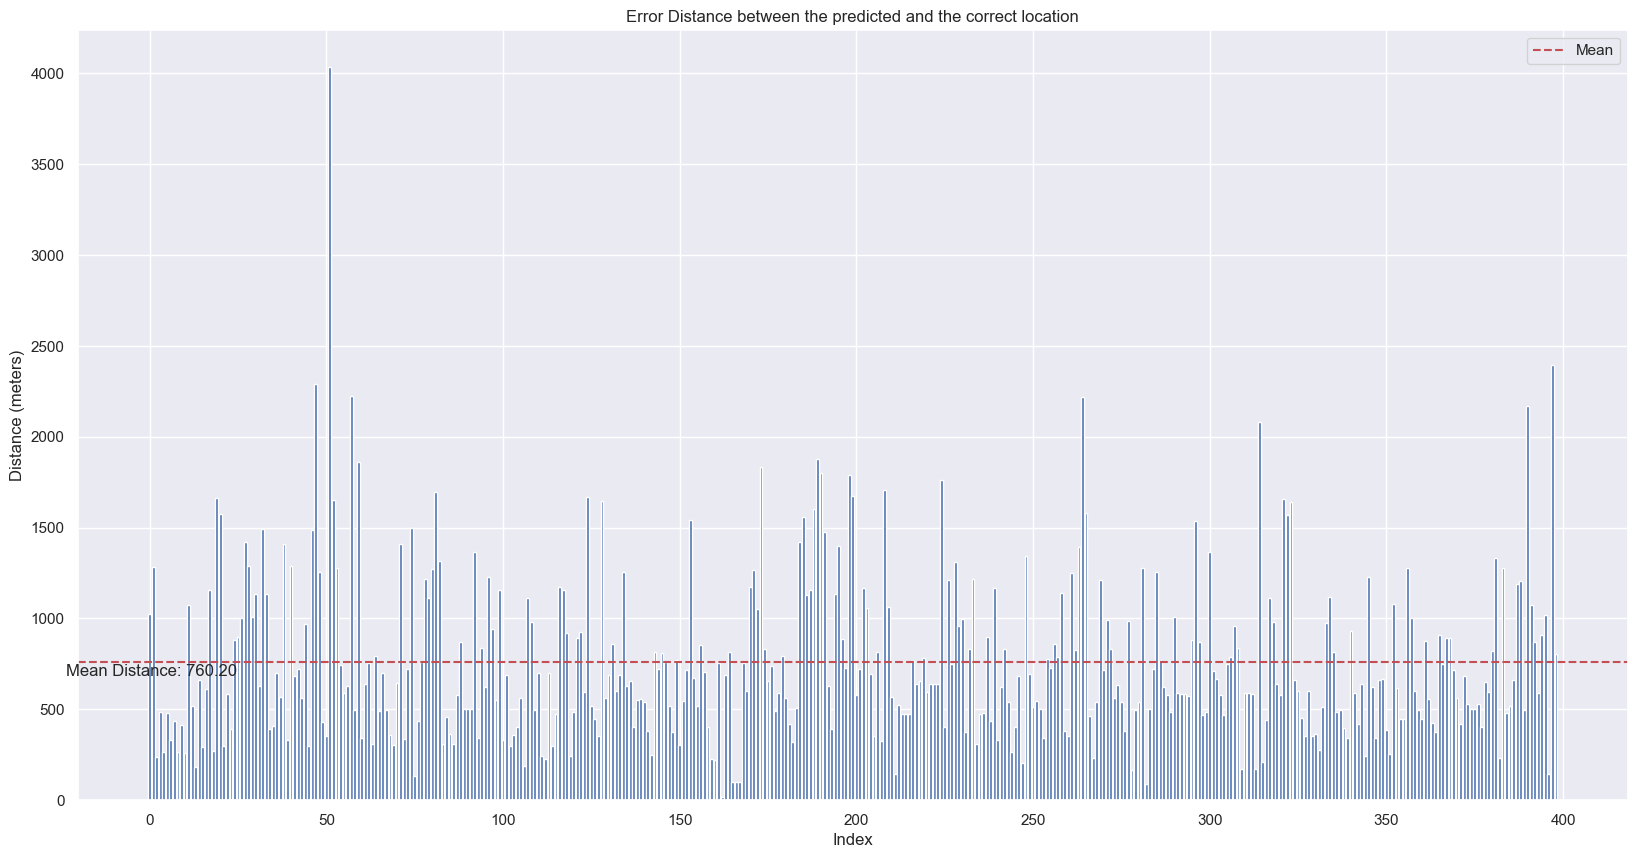

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # set the size of the figure

# plot the actual test location
plt.bar(rf_distance.index, rf_distance['Distance'])

# plot the predicted location
plt.axhline(rf_distance['Distance'].mean(), color='r', linestyle='--', label='Mean')

# add legend
plt.legend()

# add title and labels
plt.title('Error Distance between the predicted and the correct location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')

# add mean distance text annotation
plt.text(0.5, 0.9*rf_distance['Distance'].mean(), f'Mean Distance: {rf_distance["Distance"].mean():.2f}', ha='center')

plt.show()


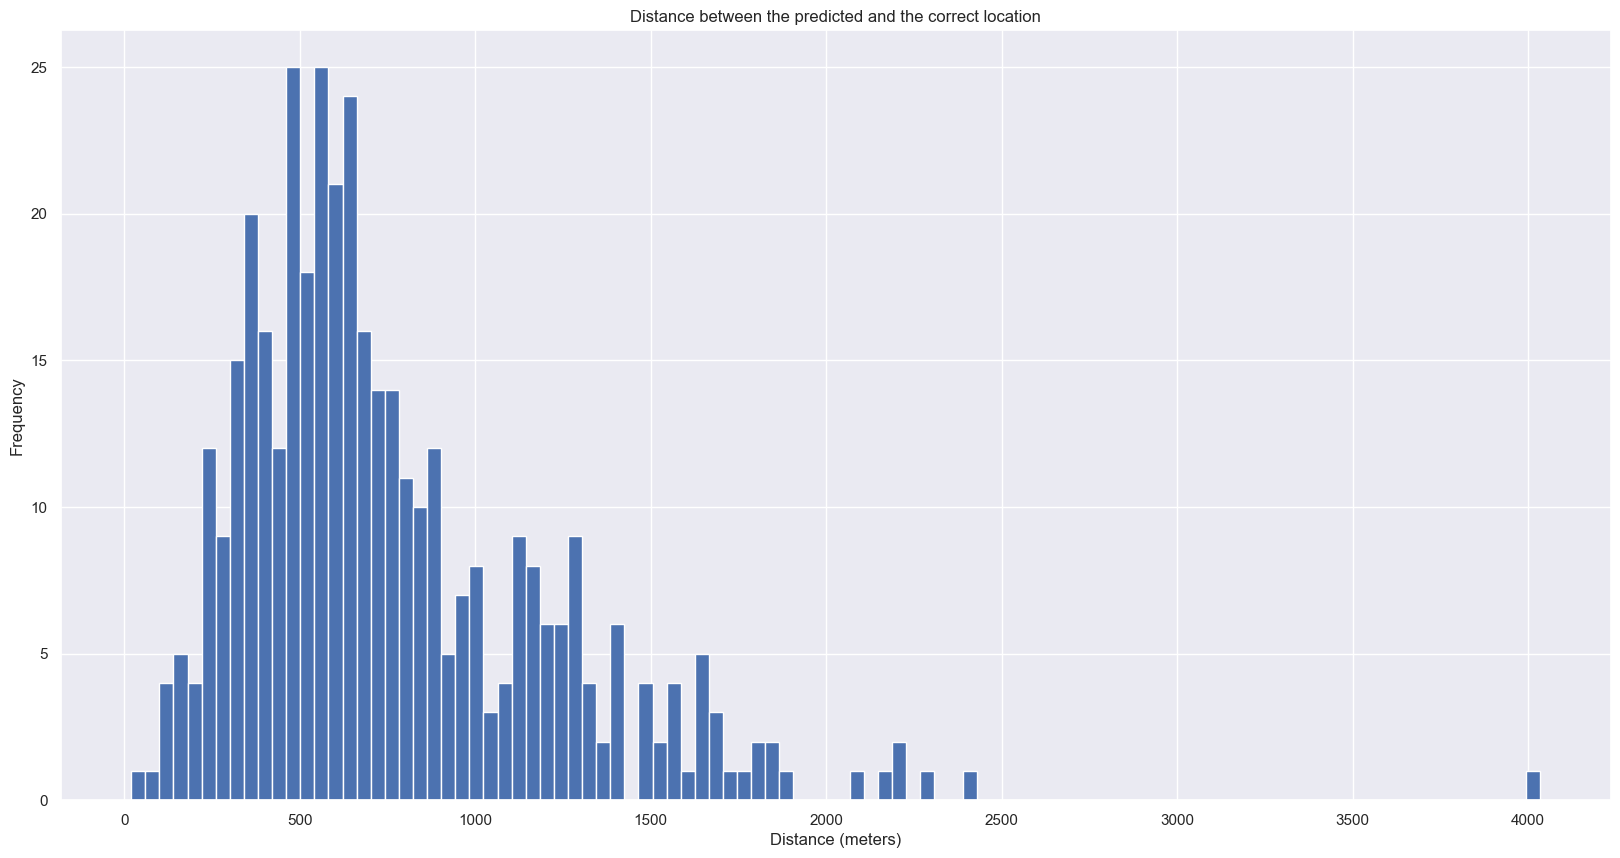

In [164]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(rf_distance['Distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
randomForest_grid_params = {'criterion': ['gini', 'entropy','log_loss'],
                            'max_depth': [3, 4,5,10],
                            'min_samples_split': [3,5,10],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'n_estimators': [10, 50]
                            }

# Create the Grid Search object
grid_search_clf = GridSearchCV(RandomForestClassifier(random_state=42), 
                               randomForest_grid_params, 
                               cv=5)

# Fit the Grid Search object to the training data
grid_search_clf.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [10, 50]})

In [166]:
# print the best parameters and score
grid_search_clf.best_params_, grid_search_clf.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'max_features': 'log2',
  'min_samples_split': 5,
  'n_estimators': 10},
 0.6930768788453797)

In [167]:
# extract the best model from the grid search
best_model_clf = grid_search_clf.best_estimator_

In [168]:
#   'criterion': 'gini',
#   'max_depth': 5,
#   'max_features': 'log2',
#   'min_samples_split': 5,
#   'n_estimators': 10
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

rf_shift_check_result = pd.DataFrame(columns=['max_depth', 
                                              'accuracy', 
                                              'f1', 
                                              'precision', 
                                              'recall', 
                                              'roc_auc'])
for i in range(5, 16):
    rf_check = RandomForestClassifier(criterion='gini',
                                      max_depth= i,
                                      max_features= 'log2',
                                      min_samples_split= 5,
                                      n_estimators=10
                                    )
    rf_check.fit(x_train, y_train_shift)
    y_pred_shift_check = rf_check.predict(x_test)
    
    # calculate scores
    accuracy = accuracy_score(y_test_shift, y_pred_shift_check)
    f1 = f1_score(y_test_shift, y_pred_shift_check,average='micro')
    precision = precision_score(y_test_shift, y_pred_shift_check,average='micro')
    recall = recall_score(y_test_shift, y_pred_shift_check,average='micro')
    roc_auc = roc_auc_score(y_test_shift, y_pred_shift_check,average='micro', multi_class='ovo')

    # append the scores to the dataframe
    rf_shift_check_result = pd.concat([rf_shift_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['max_depth', 
                                                                                                           'accuracy',
                                                                                                           'f1',
                                                                                                           'precision',
                                                                                                           'recall',
                                                                                                           'roc_auc' ])], axis=0)
    
rf_shift_check_result

max_depth  accuracy        f1  precision    recall   roc_auc
0         5  0.486216  0.486216   0.486216  0.486216  0.614662
0         6  0.503759  0.503759   0.503759  0.503759  0.627820
0         7  0.458647  0.458647   0.458647  0.458647  0.593985
0         8  0.486216  0.486216   0.486216  0.486216  0.614662
0         9  0.496241  0.496241   0.496241  0.496241  0.622180
0        10  0.473684  0.473684   0.473684  0.473684  0.605263
0        11  0.463659  0.463659   0.463659  0.463659  0.597744
0        12  0.466165  0.466165   0.466165  0.466165  0.599624
0        13  0.438596  0.438596   0.438596  0.438596  0.578947
0        14  0.443609  0.443609   0.443609  0.443609  0.582707
0        15  0.453634  0.454203   0.454774  0.453634  0.590852

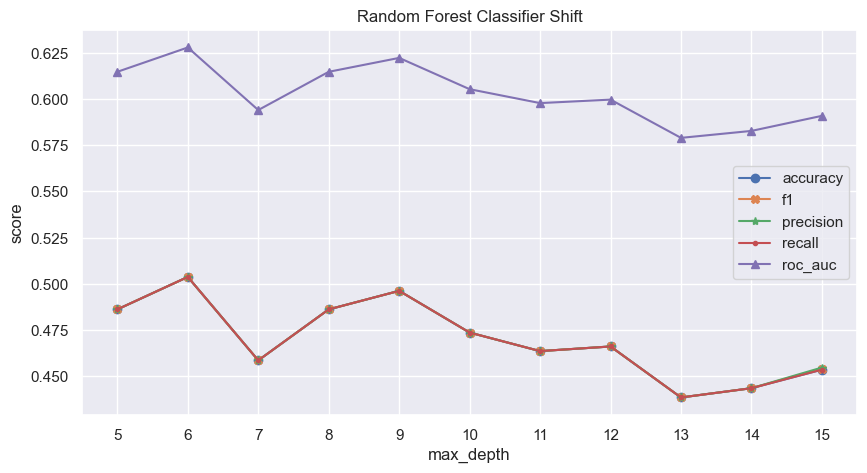

In [169]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['accuracy'], label='accuracy',marker='o')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['f1'], label='f1',marker='X')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['precision'], label='precision',marker='*')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['recall'], label='recall',marker='.')
plt.plot(rf_shift_check_result['max_depth'], rf_shift_check_result['roc_auc'], label='roc_auc',marker='^')
plt.legend(['accuracy', 'f1','precision','recall','roc_auc'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Random Forest Classifier Shift')
plt.xticks(range(5,16))
plt.show()

#### Confusion Matrix

In [170]:
# make prediction on the test set
rf_y_pred_shift = best_model_clf.predict(x_test)

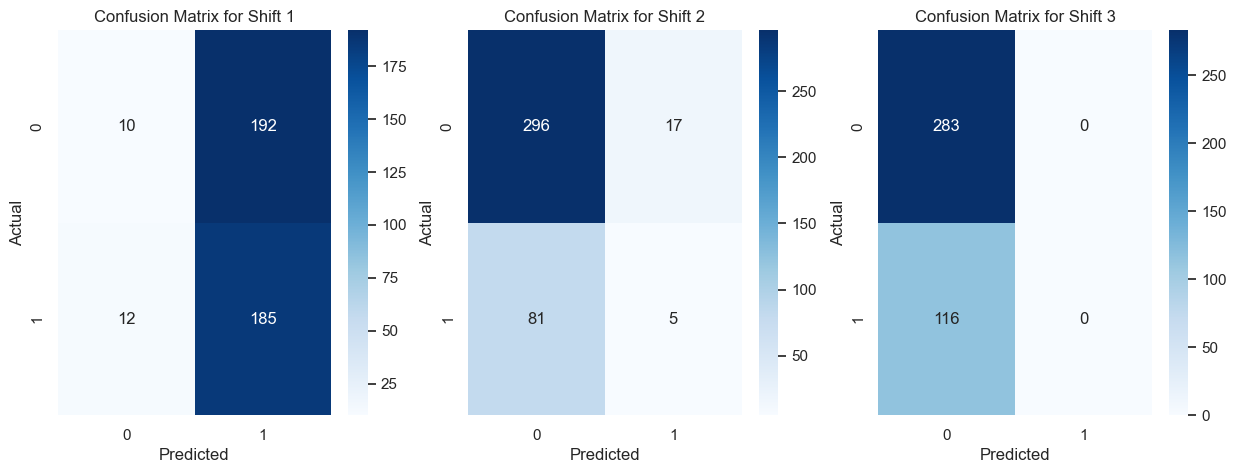

In [172]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
rf_cm = multilabel_confusion_matrix(y_test_shift, rf_y_pred_shift) 

# get the number of labels
num_labels = rf_cm.shape[0]

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(rf_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()


## Decision Tree

### Decision Tree Regressor

In [175]:
# import sklearn decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [176]:
dt_param_grid = { # parameters to tune
    'max_depth': np.arange(1, 10), # maximum depth of the tree
    'min_samples_split': np.arange(2, 10), # minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 5), # minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # number of features to consider when looking for the best split
    'criterion': ['mse', 'friedman_mse', 'mae'], # function to measure the quality of a split
    'splitter': ['best', 'random'], # strategy used to choose the split at each node
    'max_leaf_nodes': [None, 5, 10, 20], # grow a tree with max_leaf_nodes in best-first fashion
    'min_impurity_decrease': [0.0, 0.1, 0.2], # a node will be split if this split induces a decrease of the impurity greater than or equal to this value
    'ccp_alpha': [0.0, 0.1, 0.2], # complexity parameter used for Minimal Cost-Complexity Pruning
}

In [177]:
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),  # model
                              dt_param_grid,  # parameters to tune
                              cv=5, # cross-validation
                              verbose= 0 # verbose set to 0 to not print out the progress
                              )

In [178]:
# fit the grid search
dt_grid_search.fit(x_train, y_train_location)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2],
                         'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [179]:
# print the best parameters and score
dt_grid_search.best_params_, dt_grid_search.best_score_

({'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'max_depth': 1,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'splitter': 'best'},
 -0.011382787864358201)

In [180]:
# ({'ccp_alpha': 0.0,
#   'criterion': 'friedman_mse',
#   'max_depth': 1,
#   'max_features': 'auto',
#   'max_leaf_nodes': None,
#   'min_impurity_decrease': 0.0,
#   'min_samples_leaf': 1,
#   'min_samples_split': 2,
#   'splitter': 'best'},

dt_location_check_result = pd.DataFrame(columns=['max_depth', 'neg_mean_squared_error','neg_mean_absolute_error'])
for i in range(1,11):
    dt_check = DecisionTreeRegressor(
                                     ccp_alpha= 0.0,
                                     criterion= 'friedman_mse',
                                     max_depth= i,
                                     max_features= 'auto',
                                     max_leaf_nodes= None,
                                     min_impurity_decrease= 0.0,
                                     min_samples_leaf= 1,
                                     min_samples_split= 2,
                                     splitter= 'best',
                                     random_state=42
                                    )
    dt_check.fit(x_train, y_train_location)
    y_pred_location_check = dt_check.predict(x_test)
    
    # calculate scores
    mae = mean_absolute_error(y_test_location, y_pred_location_check)
    mse = mean_squared_error(y_test_location, y_pred_location_check)
    
    # append the scores to the dataframe
    dt_location_check_result = pd.concat([dt_location_check_result, pd.DataFrame([[i, mse, mae]], columns=['max_depth', 
                                                                                                           'neg_mean_squared_error',
                                                                                                           'neg_mean_absolute_error' ])], axis=0)
    
dt_location_check_result

max_depth  neg_mean_squared_error  neg_mean_absolute_error
0         1                0.000067                 0.005864
0         2                0.000067                 0.005853
0         3                0.000069                 0.005917
0         4                0.000075                 0.006055
0         5                0.000151                 0.006894
0         6                0.000165                 0.007195
0         7                0.000162                 0.007218
0         8                0.000164                 0.007361
0         9                0.000171                 0.007573
0        10                0.000180                 0.007704

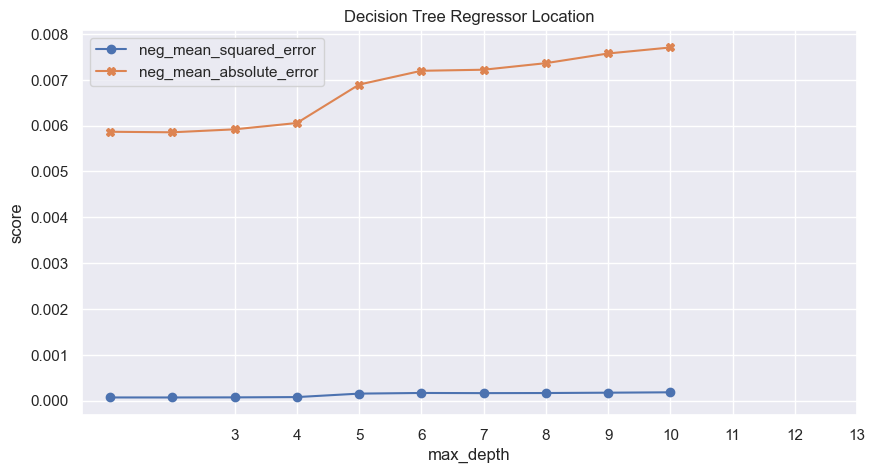

In [181]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dt_location_check_result['max_depth'], dt_location_check_result['neg_mean_squared_error'], label='neg_mean_squared_error',marker='o')
plt.plot(dt_location_check_result['max_depth'], dt_location_check_result['neg_mean_absolute_error'], label='neg_mean_absolute_error',marker='X')
plt.legend(['neg_mean_squared_error', 'neg_mean_absolute_error'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Decision Tree Regressor Location')
plt.xticks(range(3,14))
plt.show()

Make a prediction on the test data

In [182]:
dt_regression_best_model = dt_grid_search.best_estimator_

In [183]:
# make prediction on the test set and train set
dt_y_pred_location = dt_regression_best_model.predict(x_test)
dt_y_train_location = dt_regression_best_model.predict(x_train)

In [184]:
# calculate the mean absolute error and mean squared error
mae = mean_absolute_error(y_test_location, dt_y_pred_location)
mse = mean_squared_error(y_test_location, dt_y_pred_location)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  6.736266651969852e-05
Mean Absolute Error:  0.005864349579034643


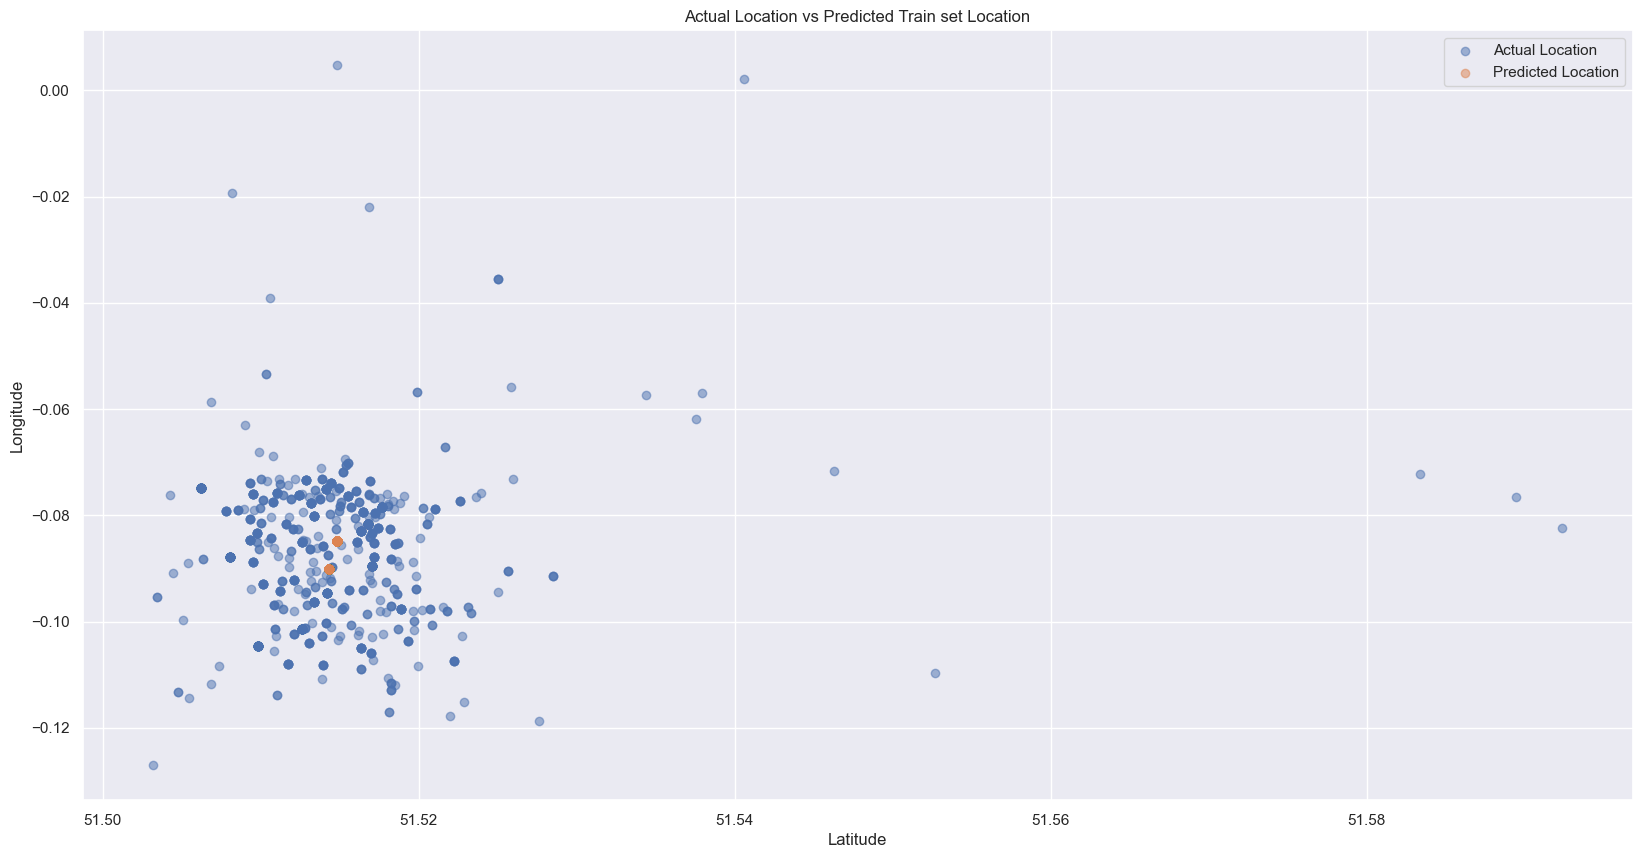

In [519]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(dt_y_train_location[:,0], dt_y_train_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

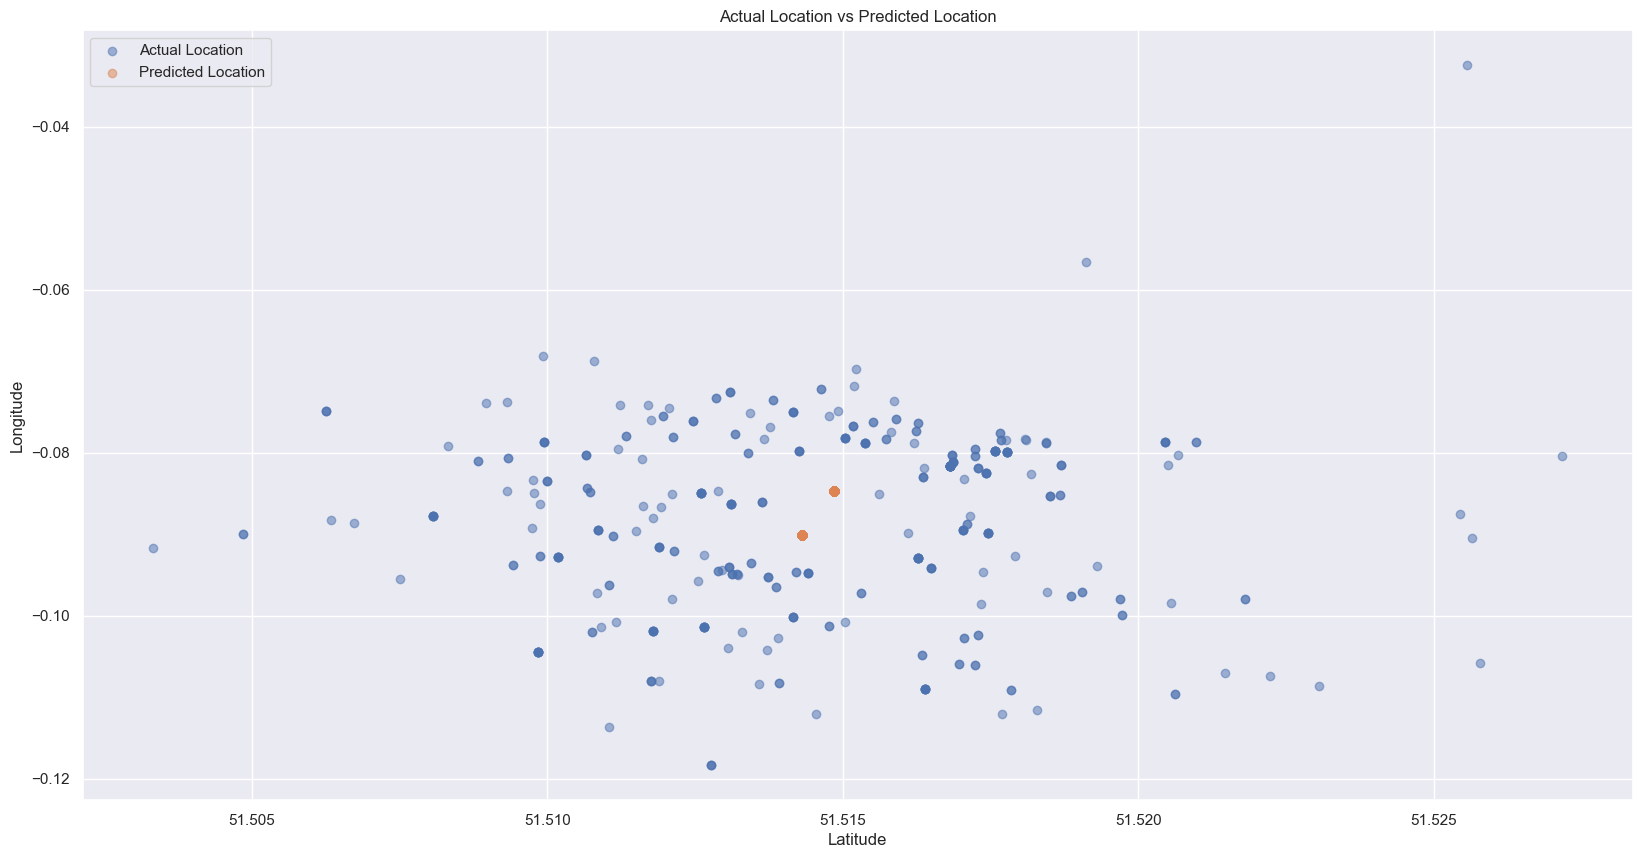

In [186]:
# Scatter plot 2d
plt.figure(figsize=(20,10))
plt.scatter(y_test_location['Latitude'], y_test_location['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(dt_y_pred_location[:,0], dt_y_pred_location[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

##### Error Distances

In [187]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
dt_distance = []
for i in range(len(dt_y_pred_location)):
    dt_distance.append(geodesic((dt_y_pred_location[i][0], dt_y_pred_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)

# convert to df
dt_distance = pd.DataFrame(dt_distance, columns=['distance'])

dt_distance.describe()

distance
count   399.000000
mean    747.020398
std     435.197822
min     160.835618
25%     442.538254
50%     658.584826
75%     908.972970
max    3821.036008

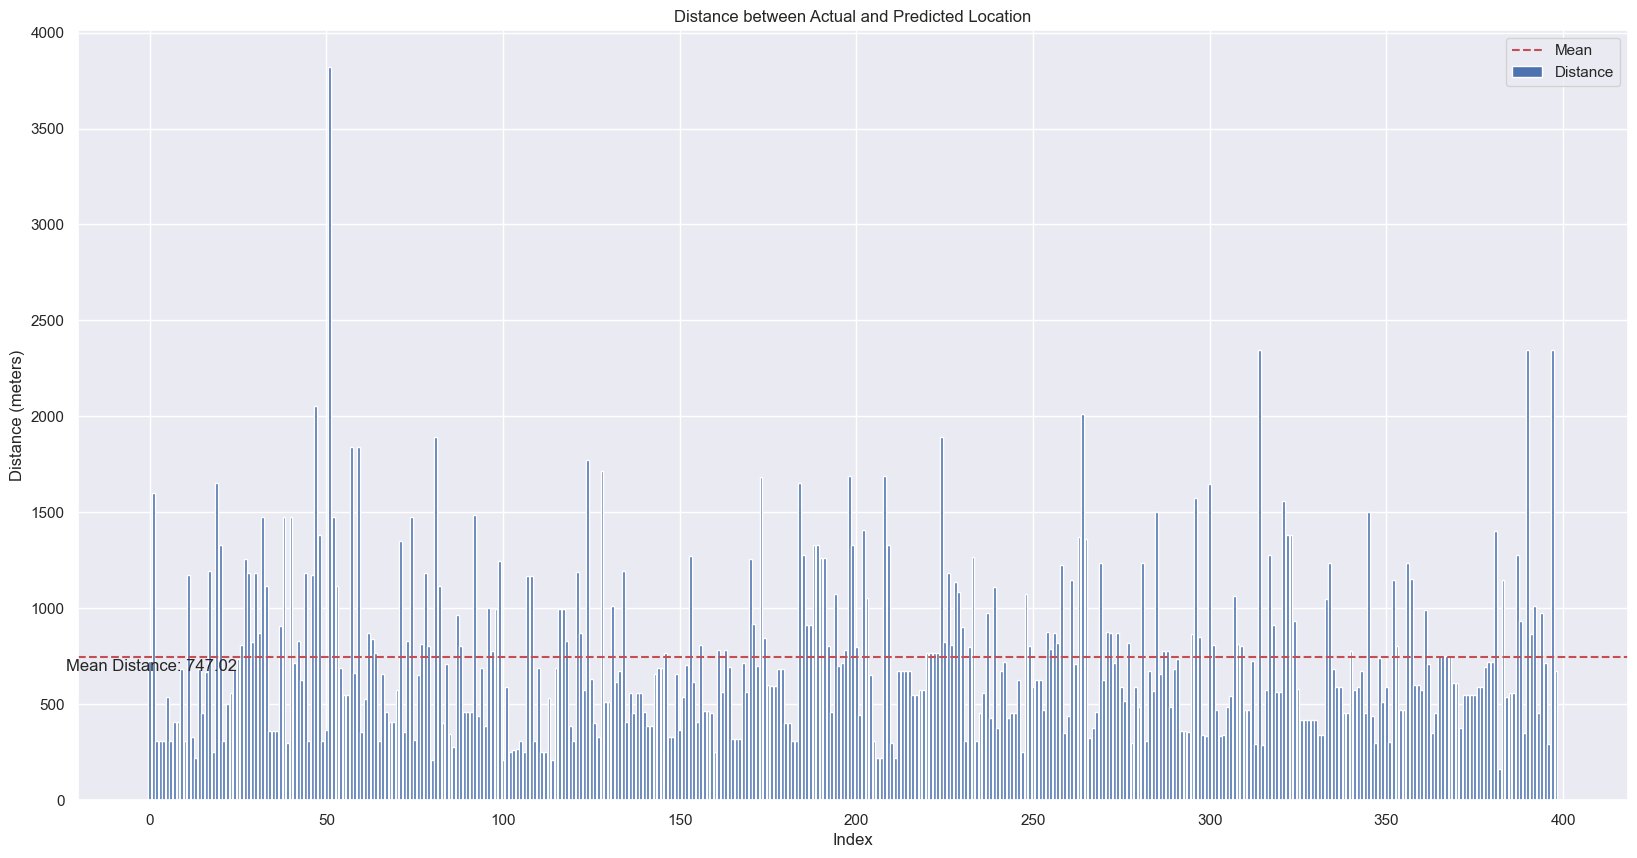

In [190]:
# plot the distance and a mean line, with value and legend
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(dt_distance.index, dt_distance['distance'], label='Distance')
plt.axhline(dt_distance['distance'].mean(), color='r', linestyle='--', label='Mean')
plt.legend()
plt.title('Distance between Actual and Predicted Location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')
plt.text(0.5,0.9*dt_distance['distance'].mean(), f'Mean Distance: {dt_distance["distance"].mean():.2f}', ha='center')
plt.show()

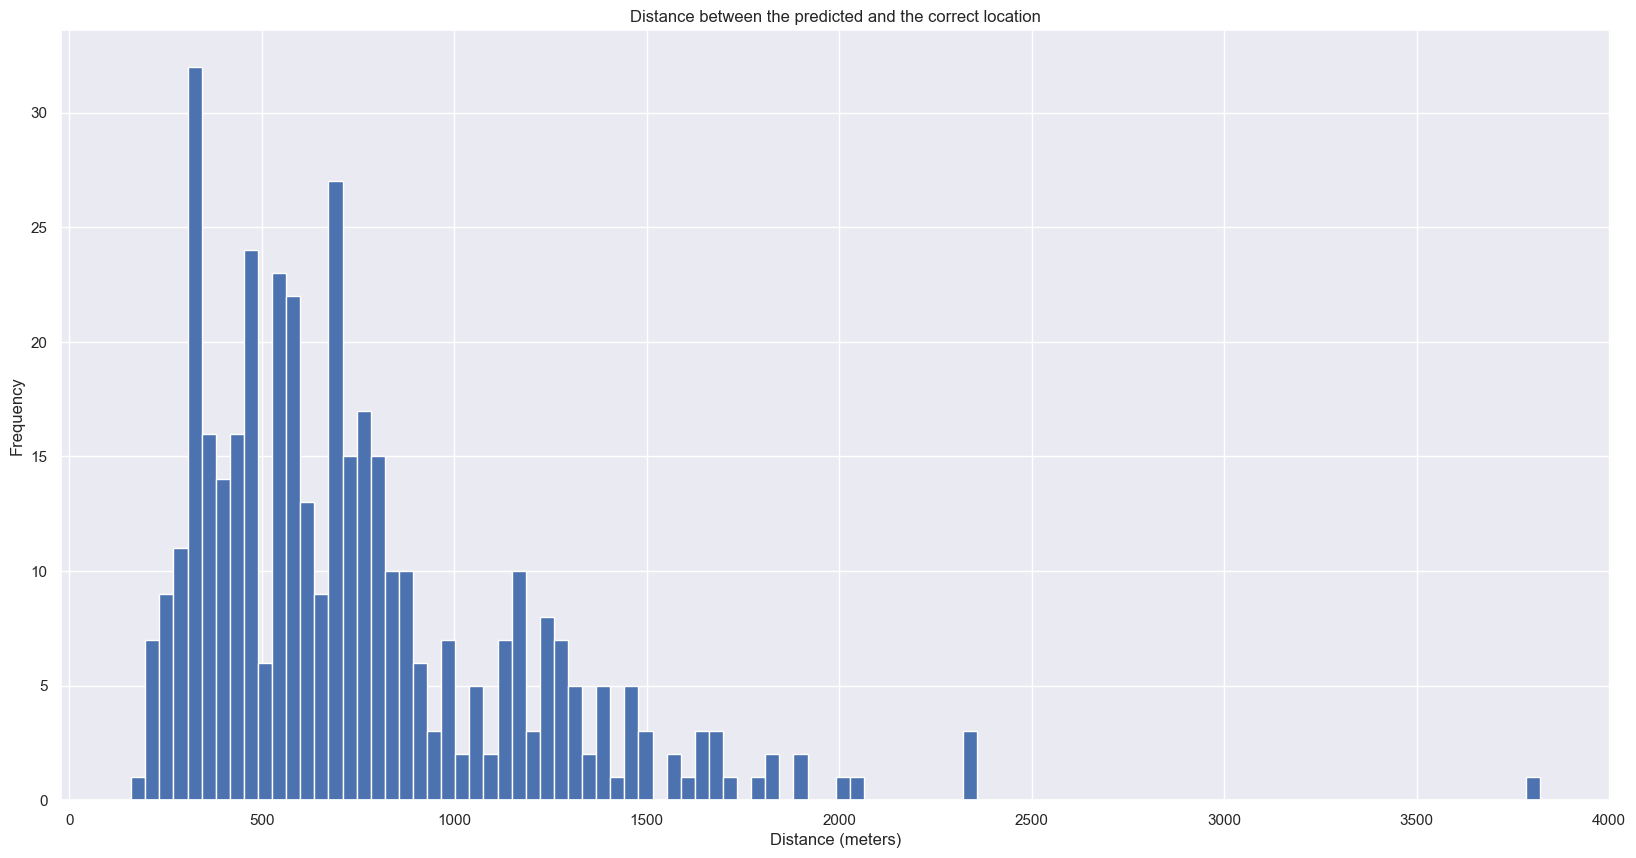

In [191]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(dt_distance['distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Decision Tree Classifier

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [193]:
dt_classifier_param_grid = {
    'criterion': ['gini', 'entropy'], # the function to measure the quality of a split
    "max_depth": [None, 3, 5, 10,50], # the maximum depth of the tree
    "min_samples_split": [2, 5, 10,100], # the minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 3, 5,100], # the minimum number of samples required to be at a leaf node
    "max_features": [None, "sqrt", "log2"], # the number of features to consider when looking for the best split
}

In [194]:
dt_classifier_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                    dt_classifier_param_grid,
                                    cv=5,
                                    verbose=0)

In [195]:
# fit the grid search
dt_classifier_search.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 100],
                         'min_samples_split': [2, 5, 10, 100]})

In [196]:
# print the best parameters and score
dt_classifier_search.best_params_, dt_classifier_search.best_score_

({'criterion': 'gini',
  'max_depth': 3,
  'max_features': 'log2',
  'min_samples_leaf': 3,
  'min_samples_split': 100},
 0.6877350353631189)

In [197]:
# ({'criterion': 'gini',
#   'max_depth': 3,
#   'max_features': 'log2',
#   'min_samples_leaf': 3,
#   'min_samples_split': 100},
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

dt_classifier_check_result = pd.DataFrame(columns=['max_depth', 'accuracy','f1_score','precision_score','recall_score','roc_auc_score'])
for i in range(3,14):
    dt_check = DecisionTreeClassifier(criterion= 'gini',
                                        max_depth= i,
                                        max_features= 'log2',
                                        min_samples_leaf= 3,
                                        min_samples_split= 100,
                                        random_state=42
                                        )
    dt_check.fit(x_train, y_train_shift)
    y_pred_shift_check = dt_check.predict(x_test)

    # calculate scores
    accuracy = accuracy_score(y_test_shift, y_pred_shift_check)
    f1 = f1_score(y_test_shift, y_pred_shift_check, average='micro')
    precision = precision_score(y_test_shift, y_pred_shift_check, average='micro')
    recall = recall_score(y_test_shift, y_pred_shift_check, average='micro')
    roc_auc = roc_auc_score(y_test_shift, y_pred_shift_check, average='micro',multi_class='ovo')

    # append the scores to the dataframe
    dt_classifier_check_result = pd.concat([dt_classifier_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['max_depth',
                                                                                                              'accuracy',
                                                                                                                'f1_score',
                                                                                                                'precision_score',
                                                                                                                'recall_score',
                                                                                                                'roc_auc_score' ])], axis=0)

dt_classifier_check_result

max_depth  accuracy  f1_score  precision_score  recall_score  roc_auc_score
0         3  0.486216  0.486216         0.486216      0.486216       0.614662
0         4  0.493734  0.493734         0.493734      0.493734       0.620301
0         5  0.493734  0.493734         0.493734      0.493734       0.620301
0         6  0.493734  0.493734         0.493734      0.493734       0.620301
0         7  0.498747  0.498747         0.498747      0.498747       0.624060
0         8  0.493734  0.493734         0.493734      0.493734       0.620301
0         9  0.498747  0.498747         0.498747      0.498747       0.624060
0        10  0.486216  0.486216         0.486216      0.486216       0.614662
0        11  0.486216  0.486216         0.486216      0.486216       0.614662
0        12  0.486216  0.486216         0.486216      0.486216       0.614662
0        13  0.486216  0.486216         0.486216      0.486216       0.614662

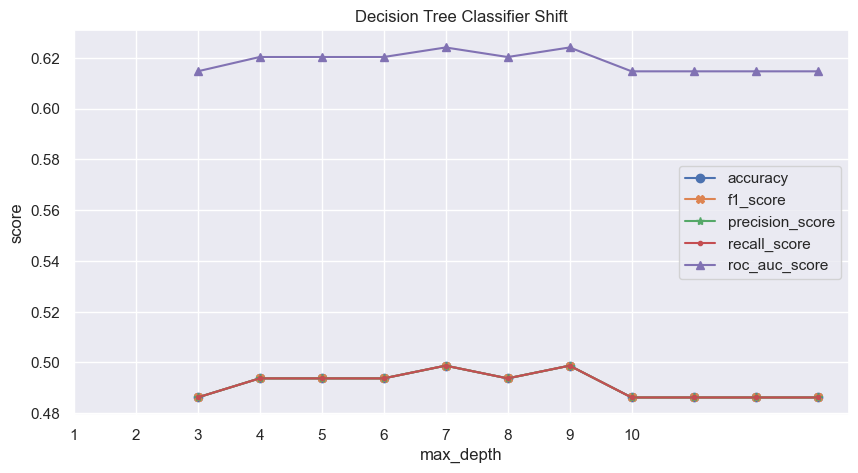

In [198]:
# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['accuracy'], label='accuracy',marker='o')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['f1_score'], label='f1_score',marker='X')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['precision_score'], label='precision_score',marker='*')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['recall_score'], label='recall_score',marker='.')
plt.plot(dt_classifier_check_result['max_depth'], dt_classifier_check_result['roc_auc_score'], label='roc_auc_score',marker='^')
plt.legend(['accuracy', 'f1_score','precision_score','recall_score','roc_auc_score'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Decision Tree Classifier Shift')
plt.xticks(range(1,11))
plt.show()

#### Confusion Matrix

In [199]:
# make prediction on the test set
dt_y_pred_shift = dt_classifier_search.predict(x_test)

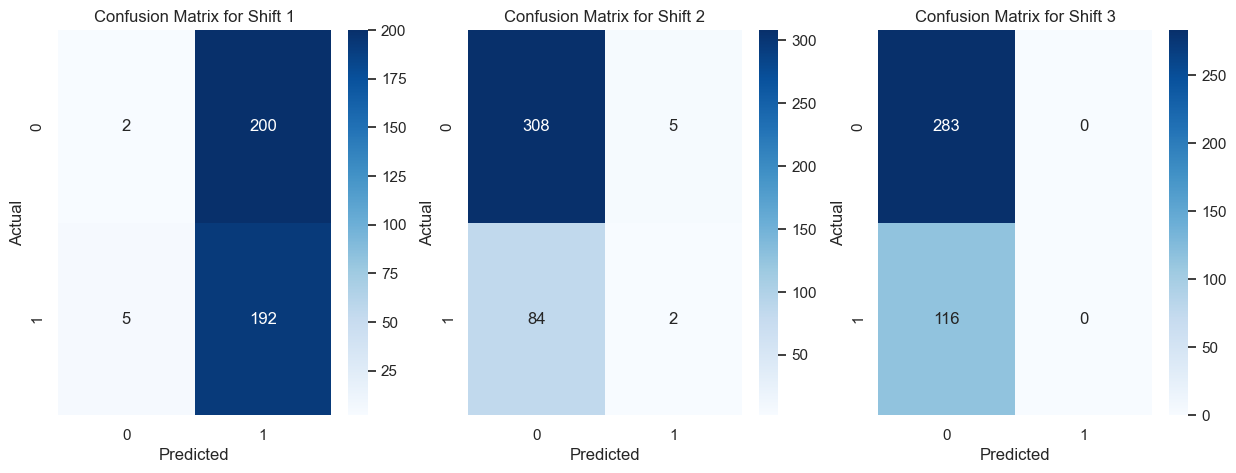

In [200]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
dt_cm = multilabel_confusion_matrix(y_test_shift, dt_y_pred_shift) 

# get the number of labels
num_labels = dt_cm.shape[0]

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(dt_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()

## Neual Network

### Neual Network Regressor

In [179]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input,Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [180]:
def nn_regression_model():
    model = tf.keras.Sequential()
    model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(2))
    # compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [181]:
# create the model
nn_regression = nn_regression_model()
nn_regression.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 32)                896       
                                                                 
 dense_48 (Dense)            (None, 2)                 66        
                                                                 
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________


In [182]:
nn_history = nn_regression.fit(x_train, y_train_location, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

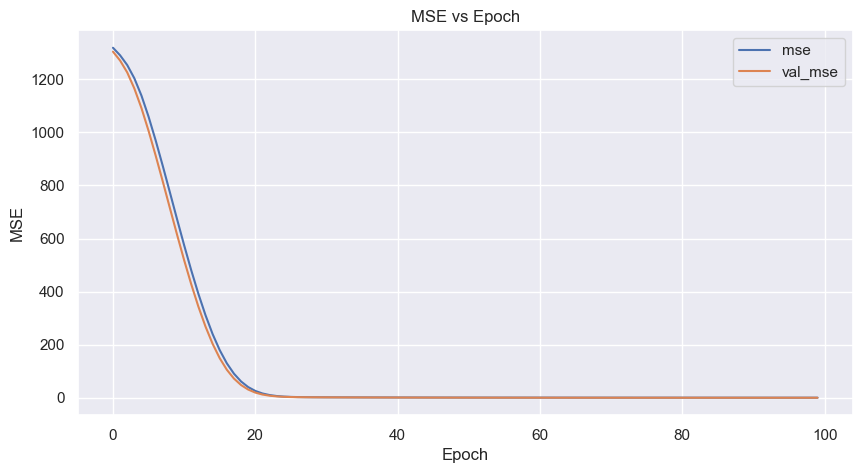

In [183]:
# plot the training and validation loss mse
plt.figure(figsize=(10, 5))
plt.plot(nn_history.history['mse'], label='mse')
plt.plot(nn_history.history['val_mse'], label='val_mse')
plt.legend(['mse', 'val_mse'])  
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch')
plt.show()

Reduce network size 

In [184]:
# define the model
def nn_regression_model2():
    model = tf.keras.Sequential()
    model.add(Dense(2, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(2))
    # compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [185]:
nn_regression2 = nn_regression_model2()
nn_regression2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 2)                 56        
                                                                 
 dense_50 (Dense)            (None, 2)                 6         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [186]:
history2 = nn_regression2.fit(x_train, y_train_location, epochs=100, batch_size=8, verbose=0, validation_split=0.2)

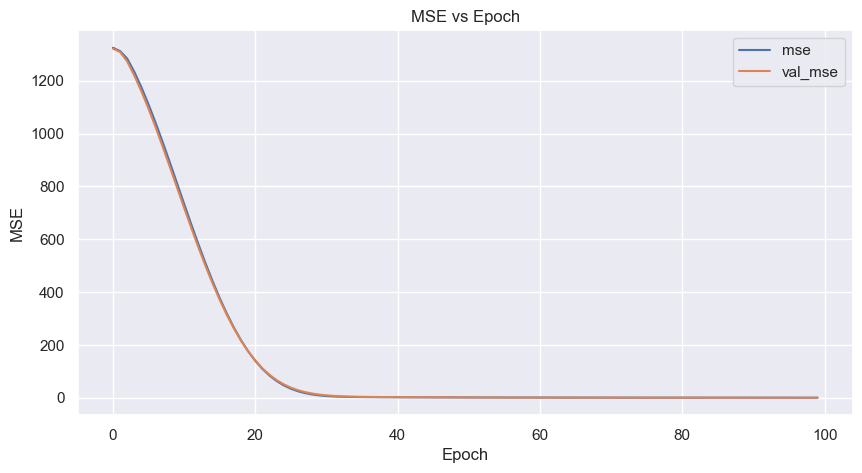

In [187]:
# plot the training and validation loss mse
plt.figure(figsize=(10, 5))
# focus on the first 40 epochs
plt.plot(history2.history['mse'], label='mse')
plt.plot(history2.history['val_mse'], label='val_mse')
plt.legend(['mse', 'val_mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch')
plt.show()

Reduce epoch early stopping

In [188]:
# define the model
def nn_regression_model3():
    model = tf.keras.Sequential()
    model.add(Dense(2, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(2))
    # compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

In [189]:
nn_regression3 = nn_regression_model3()
nn_regression3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 2)                 56        
                                                                 
 dense_52 (Dense)            (None, 2)                 6         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [190]:
history3 = nn_regression3.fit(x_train, y_train_location, epochs=50, batch_size=8, verbose=0, validation_split=0.2)

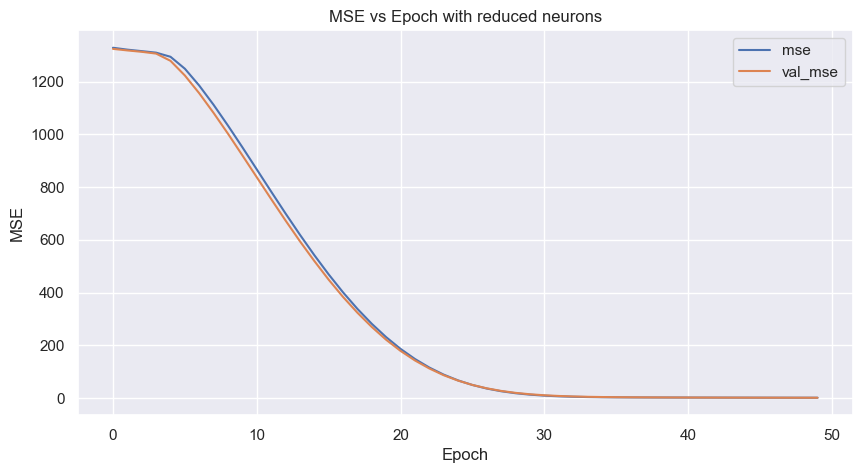

In [191]:
# plot the training and validation loss mse
plt.figure(figsize=(10, 5))
plt.plot(history3.history['mse'], label='mse')
plt.plot(history3.history['val_mse'], label='val_mse')
plt.legend(['mse', 'val_mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch with reduced neurons')
plt.show()

In [192]:
# make prediction on the train set and test set
nn_y_pred_train = nn_regression3.predict(x_train)
nn_y_pred_test = nn_regression3.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [193]:
# calculate the mse for the test set
mae = mean_absolute_error(y_test_location, nn_y_pred_test)
mse = mean_squared_error(y_test_location, nn_y_pred_test)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  16.281758472755
Mean Absolute Error:  1.9260661218862258


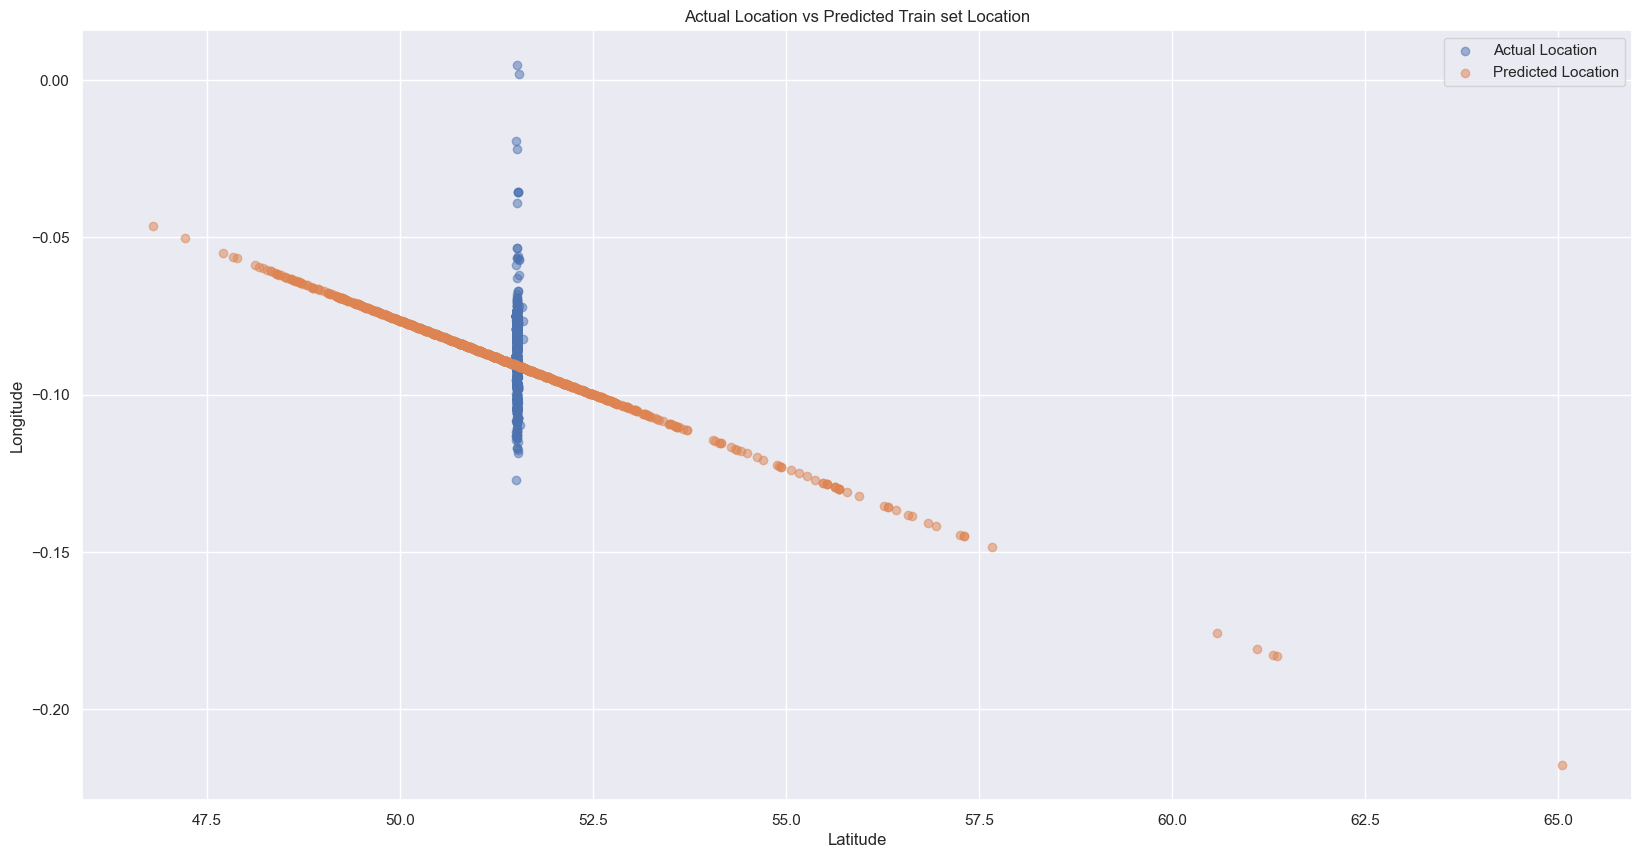

In [194]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(nn_y_pred_train[:,0],nn_y_pred_train[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

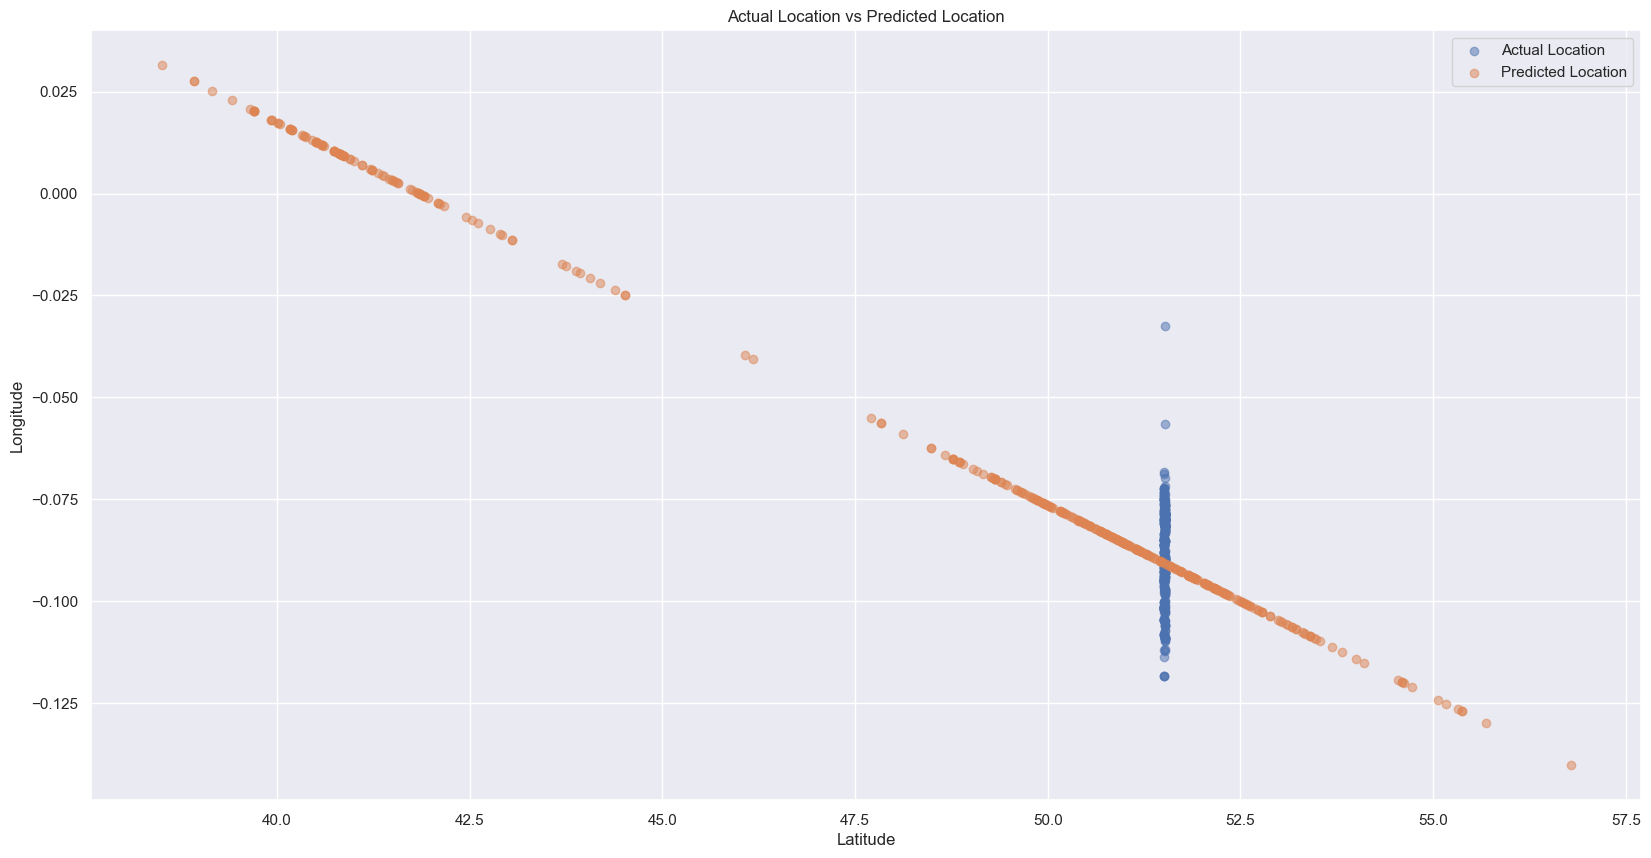

In [195]:
# Scatter plot 2d
plt.figure(figsize=(20,10))
plt.scatter(y_test_location['Latitude'], y_test_location['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(nn_y_pred_test[:,0], nn_y_pred_test[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

nn_regression_model4

In [196]:
# define the model
def nn_regression_model4():
    model = tf.keras.Sequential()
    model.add(Dense(32, activation='tanh', input_shape=(x_train.shape[1],)))
    model.add(Dense(2))
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    return model

In [197]:
nn_regression4 = nn_regression_model4()
nn_regression4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 32)                896       
                                                                 
 dense_54 (Dense)            (None, 2)                 66        
                                                                 
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________


In [198]:
history4 = nn_regression4.fit(x_train, y_train_location, epochs=188, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/188
745/745 [==============================] - 3s 3ms/step - loss: 1288.0371 - mse: 1288.0371 - val_loss: 1243.9114 - val_mse: 1243.9114
Epoch 2/188
745/745 [==============================] - 2s 3ms/step - loss: 1175.4646 - mse: 1175.4646 - val_loss: 1119.4277 - val_mse: 1119.4277
Epoch 3/188
745/745 [==============================] - 2s 3ms/step - loss: 1040.0350 - mse: 1040.0350 - val_loss: 975.1763 - val_mse: 975.1763
Epoch 4/188
745/745 [==============================] - 2s 3ms/step - loss: 895.4238 - mse: 895.4238 - val_loss: 832.0688 - val_mse: 832.0688
Epoch 5/188
745/745 [==============================] - 2s 3ms/step - loss: 759.6169 - mse: 759.6169 - val_loss: 702.9527 - val_mse: 702.9527
Epoch 6/188
745/745 [==============================] - 3s 3ms/step - loss: 640.2398 - mse: 640.2398 - val_loss: 591.0413 - val_mse: 591.0413
Epoch 7/188
745/745 [==============================] - 3s 3ms/step - loss: 537.5914 - mse: 537.5914 - val_loss: 495.0357 - val_mse: 495.0357
Epo

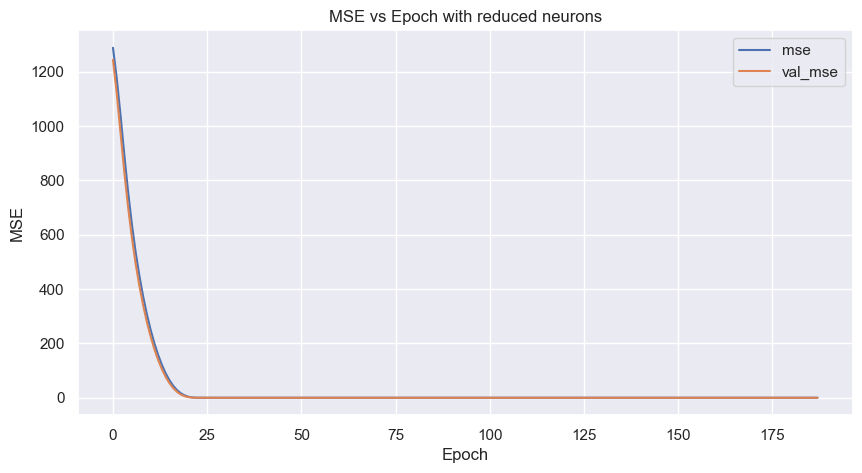

In [199]:
# plot the training and validation loss mse
plt.figure(figsize=(10, 5))
plt.plot(history4.history['mse'], label='mse')
plt.plot(history4.history['val_mse'], label='val_mse')
plt.legend(['mse', 'val_mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch with reduced neurons')
plt.show()

In [200]:
# make prediction on the train set and test set
nn_y_pred_train = nn_regression4.predict(x_train)
nn_y_pred_test = nn_regression4.predict(x_test)

13/13 [==============================] - 0s 1ms/step


In [201]:
mae = mean_absolute_error(y_test_location, nn_y_pred_test)
mse = mean_squared_error(y_test_location, nn_y_pred_test)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  0.0020533094574428593
Mean Absolute Error:  0.022773667622108442


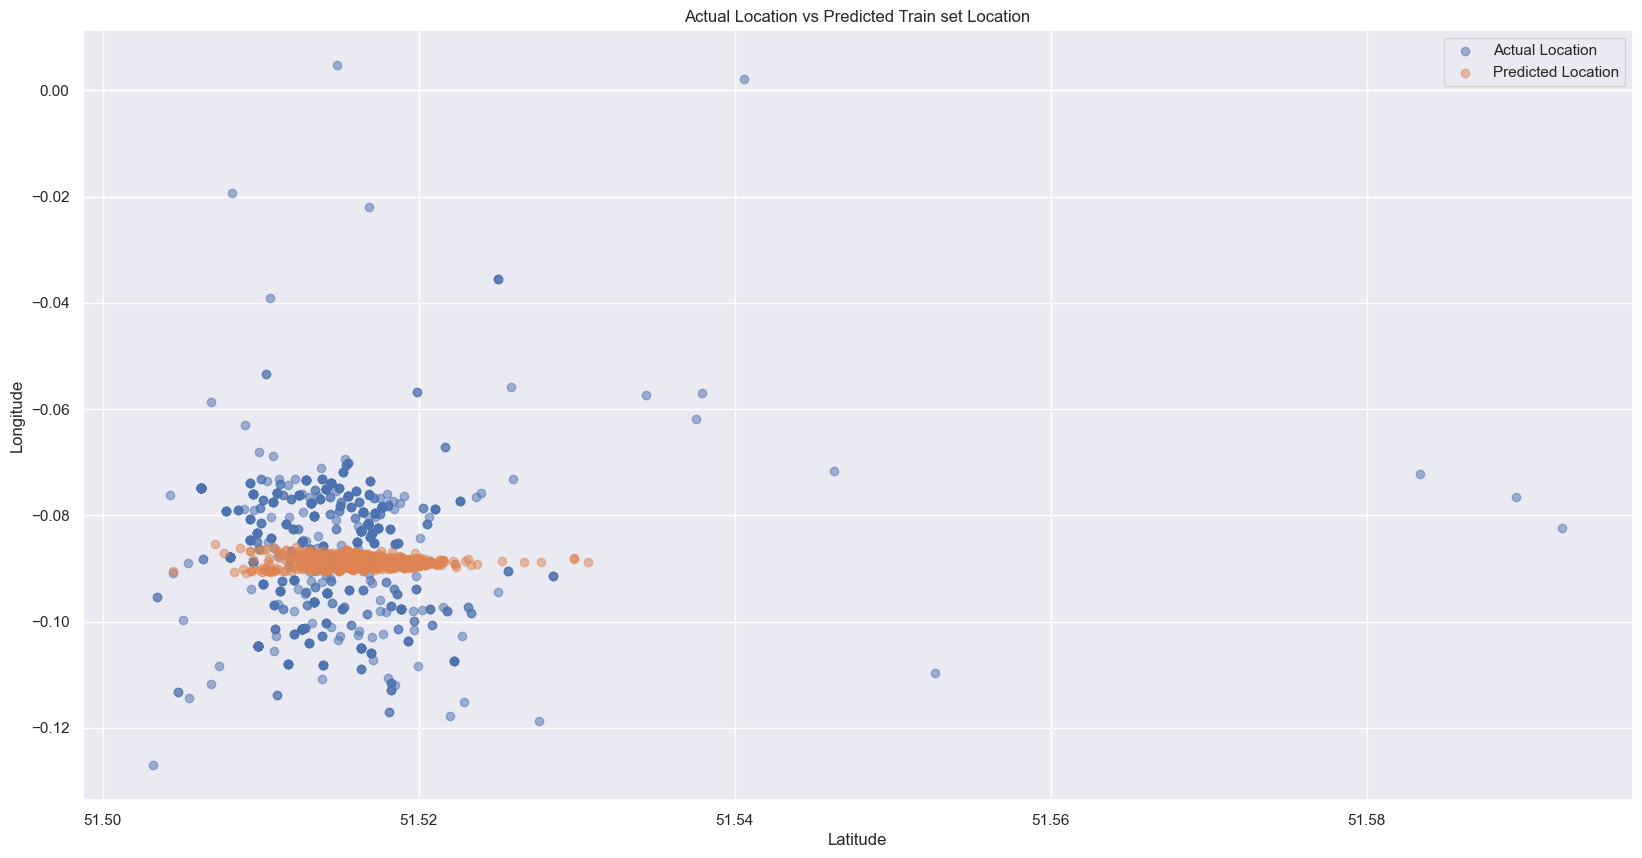

In [202]:
# plot the actual and predicted location
plt.figure(figsize=(20,10))
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(nn_y_pred_train[:,0],nn_y_pred_train[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

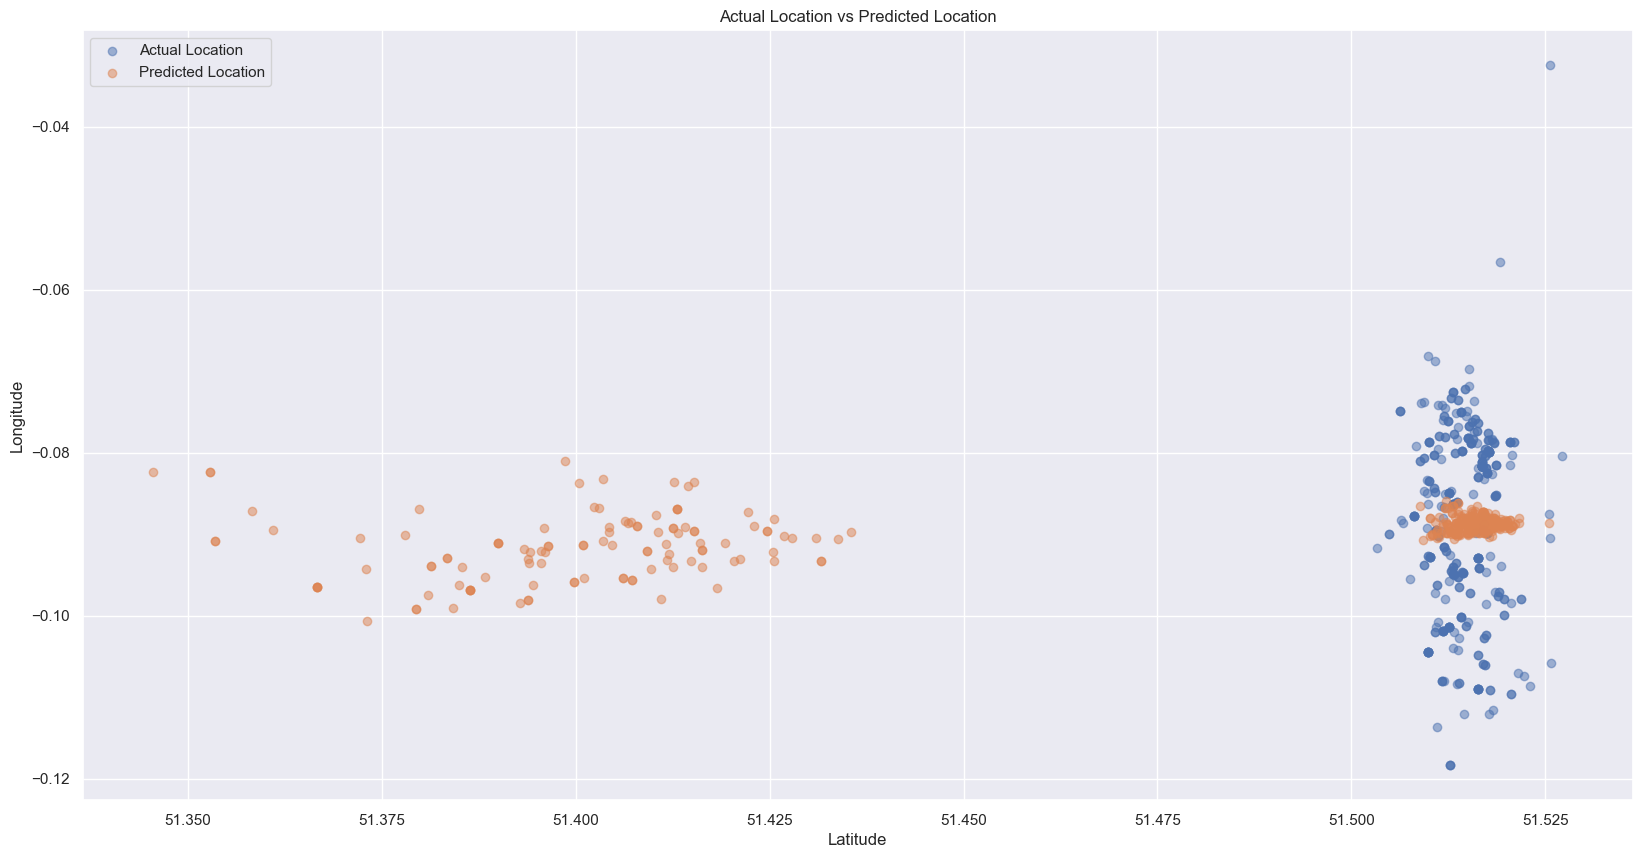

In [203]:
# plot the actual and predicted location
plt.figure(figsize=(20,10))
plt.scatter(y_test_location['Latitude'], y_test_location['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(nn_y_pred_test[:,0], nn_y_pred_test[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Error Distances

In [207]:
# calculate the actual distance between the predicted and the correct location 
from geopy.distance import geodesic
distance = []
for i in range(len(nn_y_pred_test)):
    distance.append(geodesic((nn_y_pred_test[i][0],nn_y_pred_test[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)


# convert distance to pd
nn_regression_distance = pd.DataFrame(distance, columns=['Distance'])

nn_regression_distance.describe()


Distance
count    399.000000
mean    4327.475387
std     5586.304737
min      108.353306
25%      669.391303
50%      991.242152
75%    10426.352103
max    18608.128078

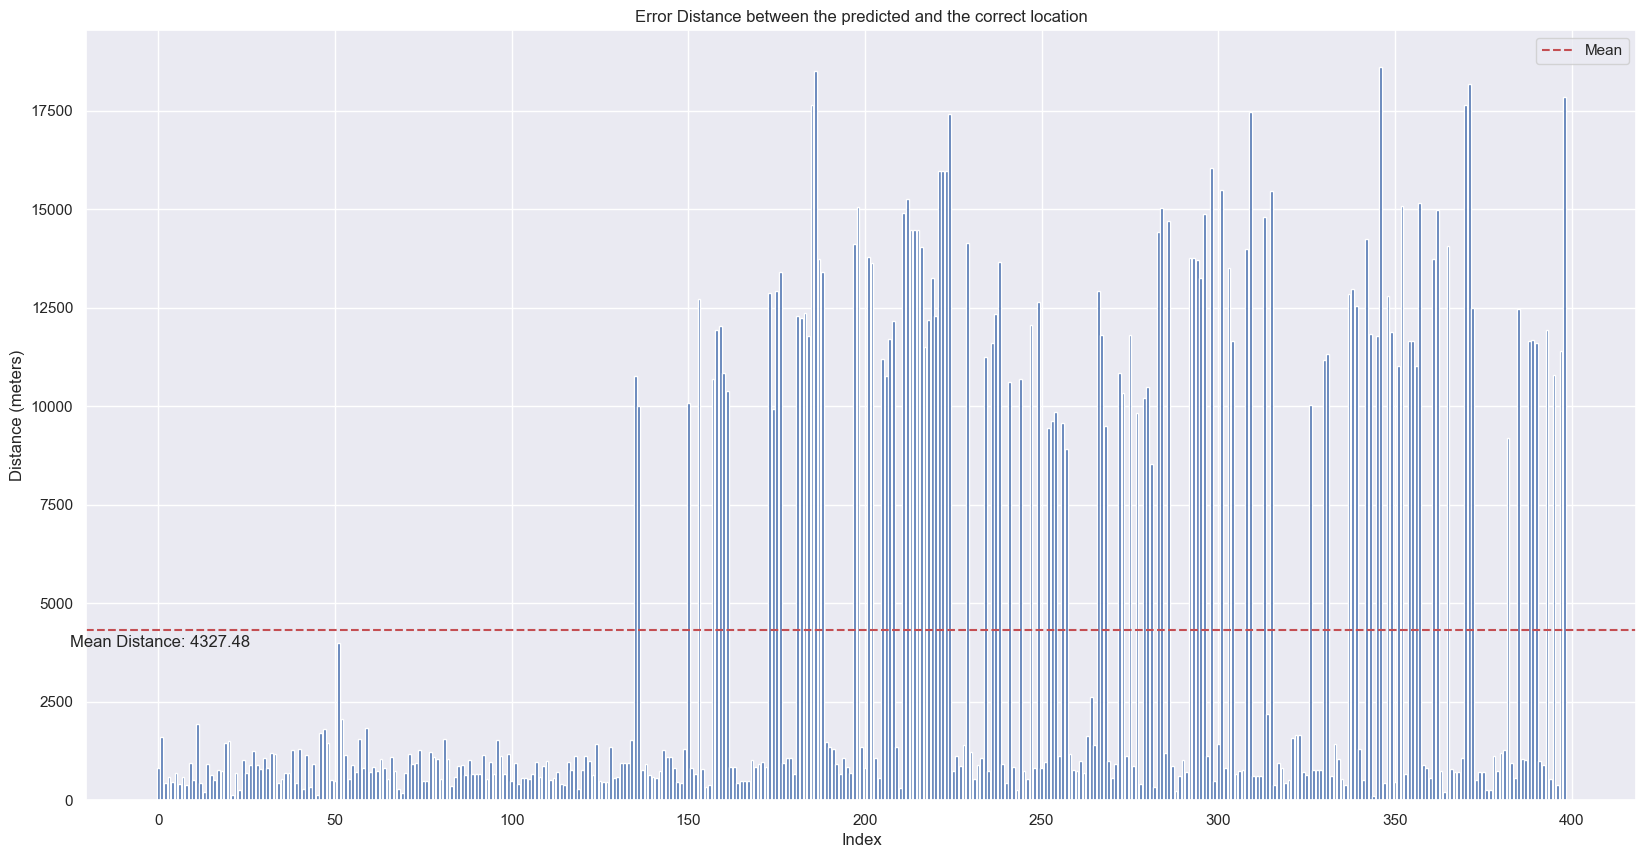

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # set the size of the figure

# plot the actual test location
plt.bar(nn_regression_distance.index, nn_regression_distance['Distance'])

# plot the predicted location
plt.axhline(nn_regression_distance['Distance'].mean(), color='r', linestyle='--', label='Mean')

# add legend
plt.legend()

# add title and labels
plt.title('Error Distance between the predicted and the correct location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')

# add mean distance text annotation
plt.text(0.5, 0.9*nn_regression_distance['Distance'].mean(), f'Mean Distance: {nn_regression_distance["Distance"].mean():.2f}', ha='center')

plt.show()


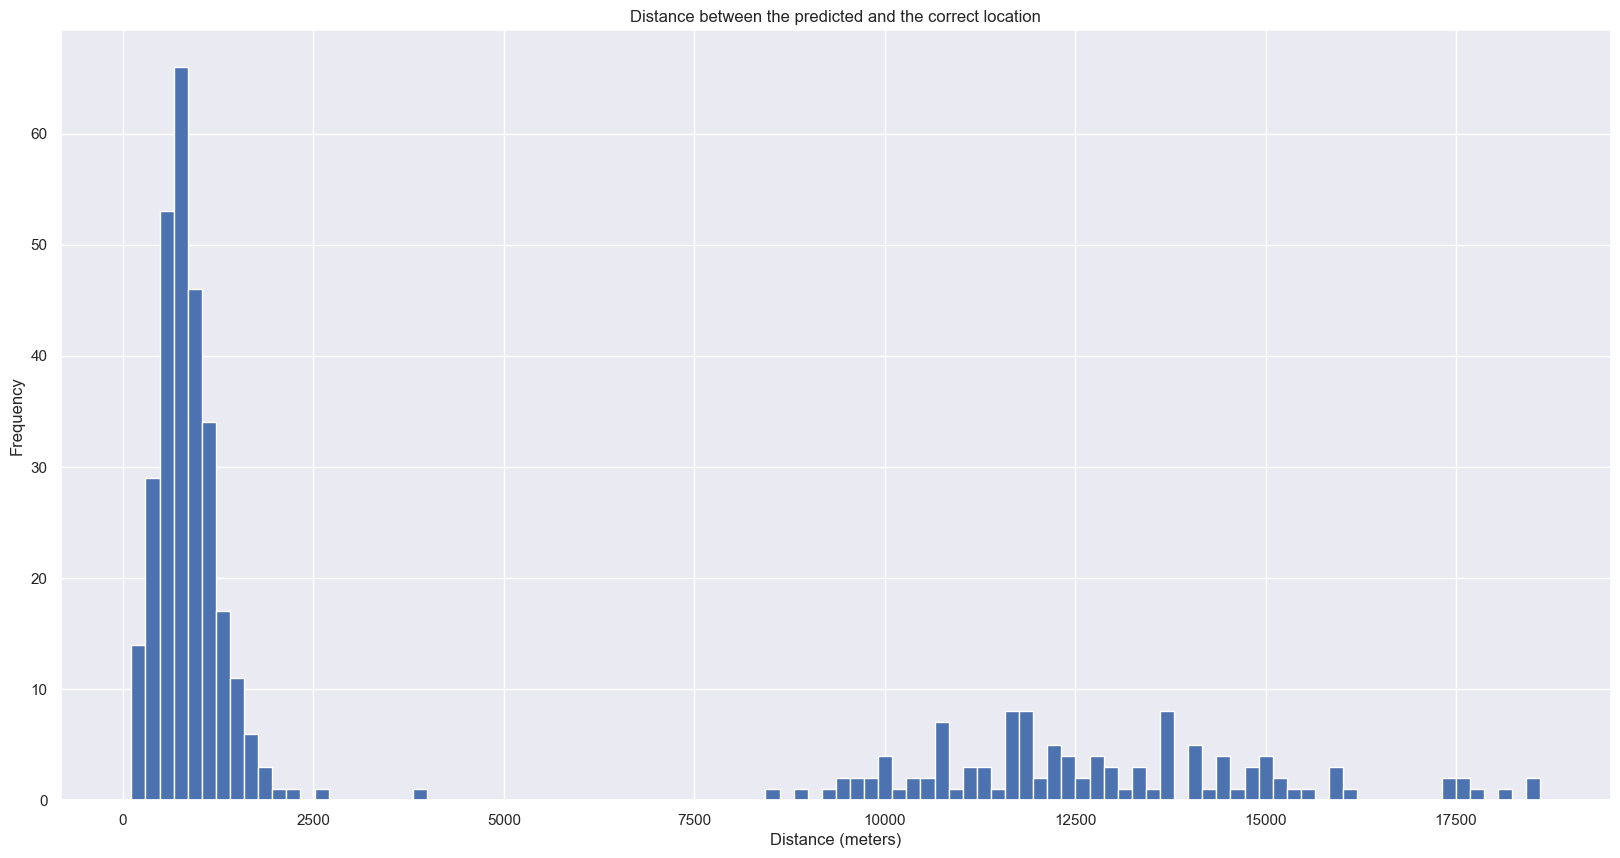

In [209]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(nn_regression_distance['Distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

### Neual Network Classifier

In [211]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [212]:
nn_cf_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [213]:
mlp = MLPClassifier(random_state=42, max_iter=1000)

In [214]:
nn_cf_grid_search = GridSearchCV(mlp, 
                           nn_cf_param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1,
                           verbose=0)

In [215]:
nn_cf_grid_search.fit(x_train, y_train_shift)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [216]:
nn_cf_grid_search.best_params_, nn_cf_grid_search.best_score_

({'activation': 'tanh',
  'alpha': 0.0001,
  'hidden_layer_sizes': (100, 100),
  'learning_rate': 'constant',
  'solver': 'sgd'},
 0.6662124087171526)

In [217]:
# extract the best model
nn_cf_best_model = nn_cf_grid_search.best_estimator_

In [218]:
# 'activation': 'tanh',
#   'alpha': 0.0001,
#   'hidden_layer_sizes': (100, 100),
#   'learning_rate': 'constant',
#   'solver': 'sgd'},
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

nn_shift_check_result = pd.DataFrame(columns=['hidden_layer_sizes', 
                                              'accuracy', 
                                              'f1', 
                                              'precision', 
                                              'recall', 
                                              'roc_auc'])
for i in range(100,190):
    nn_check = MLPClassifier( activation = 'tanh',
                                        alpha = 0.0001,
                                        hidden_layer_sizes = (i, i),
                                        learning_rate = 'constant',
                                        solver = 'sgd',
                                        random_state=42,
                                        max_iter=1000
                                    )
    nn_check.fit(x_train, y_train_shift)
    y_pred_shift_check = nn_check.predict(x_test)
    
    # calculate scores
    accuracy = accuracy_score(y_test_shift, y_pred_shift_check)
    f1 = f1_score(y_test_shift, y_pred_shift_check,average='micro')
    precision = precision_score(y_test_shift, y_pred_shift_check,average='micro')
    recall = recall_score(y_test_shift, y_pred_shift_check,average='micro')
    roc_auc = roc_auc_score(y_test_shift, y_pred_shift_check,average='micro', multi_class='ovo')

    # append the scores to the dataframe
    nn_shift_check_result = pd.concat([nn_shift_check_result, pd.DataFrame([[i, accuracy, f1, precision, recall, roc_auc]], columns=['hidden_layer_sizes', 
                                                                                                           'accuracy',
                                                                                                           'f1',
                                                                                                           'precision',
                                                                                                           'recall',
                                                                                                           'roc_auc' ])], axis=0)
    
nn_shift_check_result

hidden_layer_sizes  accuracy        f1  precision    recall   roc_auc
0                 100  0.461153  0.481865   0.498660  0.466165  0.615915
0                 101  0.486216  0.494382   0.492537  0.496241  0.620301
0                 102  0.486216  0.491885   0.490050  0.493734  0.618421
0                 103  0.481203  0.488169   0.485149  0.491228  0.615288
0                 104  0.488722  0.489335   0.489950  0.488722  0.617168
..                ...       ...       ...        ...       ...       ...
0                 185  0.468672  0.485820   0.478155  0.493734  0.612155
0                 186  0.483709  0.489950   0.491184  0.488722  0.617794
0                 187  0.488722  0.493116   0.492500  0.493734  0.619674
0                 188  0.466165  0.474407   0.472637  0.476190  0.605263
0                 189  0.483709  0.489335   0.489950  0.488722  0.617168

[90 rows x 6 columns]

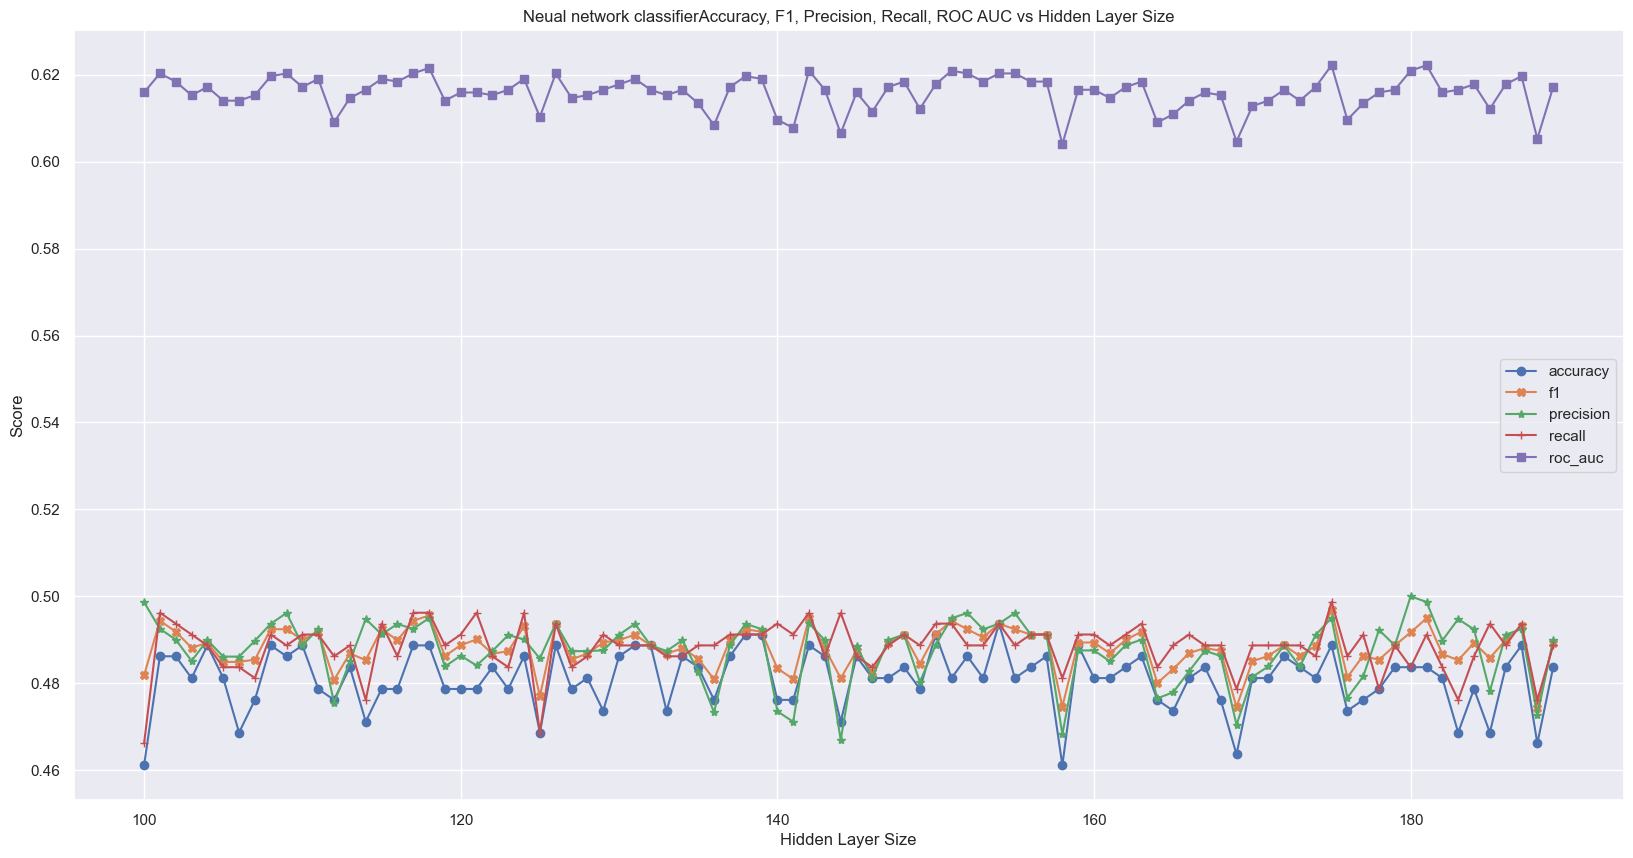

In [219]:
# plot the result
plt.figure(figsize=(20,10))
plt.plot(nn_shift_check_result['hidden_layer_sizes'], nn_shift_check_result['accuracy'], label='Accuracy', marker ='o')
plt.plot(nn_shift_check_result['hidden_layer_sizes'], nn_shift_check_result['f1'], label='F1', marker ='X')
plt.plot(nn_shift_check_result['hidden_layer_sizes'], nn_shift_check_result['precision'], label='Precision', marker ='*')
plt.plot(nn_shift_check_result['hidden_layer_sizes'], nn_shift_check_result['recall'], label='Recall', marker ='+')
plt.plot(nn_shift_check_result['hidden_layer_sizes'], nn_shift_check_result['roc_auc'], label='ROC AUC', marker ='s')
plt.legend(['accuracy', 'f1','precision','recall','roc_auc'])
plt.title('Neual network classifierAccuracy, F1, Precision, Recall, ROC AUC vs Hidden Layer Size')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Score')
plt.show()

#### Confusion Matrix

In [227]:
nn_cf_y_pred_test_shift = nn_cf_best_model.predict(x_test)

In [228]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_thresholds(y_true, y_pred_proba, start=0, end=1, increment=0.01, multi_class=None):
    scores = []
    thresholds = np.arange(start, end + increment, increment)

    for threshold in thresholds:
        # Threshold the prediction
        y_pred = (y_pred_proba >= threshold).astype(int)

        # Calculate scores
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='micro')
        precision = precision_score(y_true, y_pred, average='micro')
        recall = recall_score(y_true, y_pred, average='micro')
        roc_auc = roc_auc_score(y_true, y_pred, average='micro', multi_class=multi_class)

        scores.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'F1 score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC AUC': roc_auc
        })

    return pd.DataFrame(scores)

In [229]:
nn_cf_result_df = evaluate_thresholds(y_test_shift, nn_cf_y_pred_test_shift, multi_class='ovo')
nn_cf_result_df

Threshold  Accuracy  F1 score  Precision    Recall   ROC AUC
0         0.00  0.000000  0.500000   0.333333  1.000000  0.500000
1         0.01  0.461153  0.481865   0.498660  0.466165  0.615915
2         0.02  0.461153  0.481865   0.498660  0.466165  0.615915
3         0.03  0.461153  0.481865   0.498660  0.466165  0.615915
4         0.04  0.461153  0.481865   0.498660  0.466165  0.615915
..         ...       ...       ...        ...       ...       ...
96        0.96  0.461153  0.481865   0.498660  0.466165  0.615915
97        0.97  0.461153  0.481865   0.498660  0.466165  0.615915
98        0.98  0.461153  0.481865   0.498660  0.466165  0.615915
99        0.99  0.461153  0.481865   0.498660  0.466165  0.615915
100       1.00  0.461153  0.481865   0.498660  0.466165  0.615915

[101 rows x 6 columns]

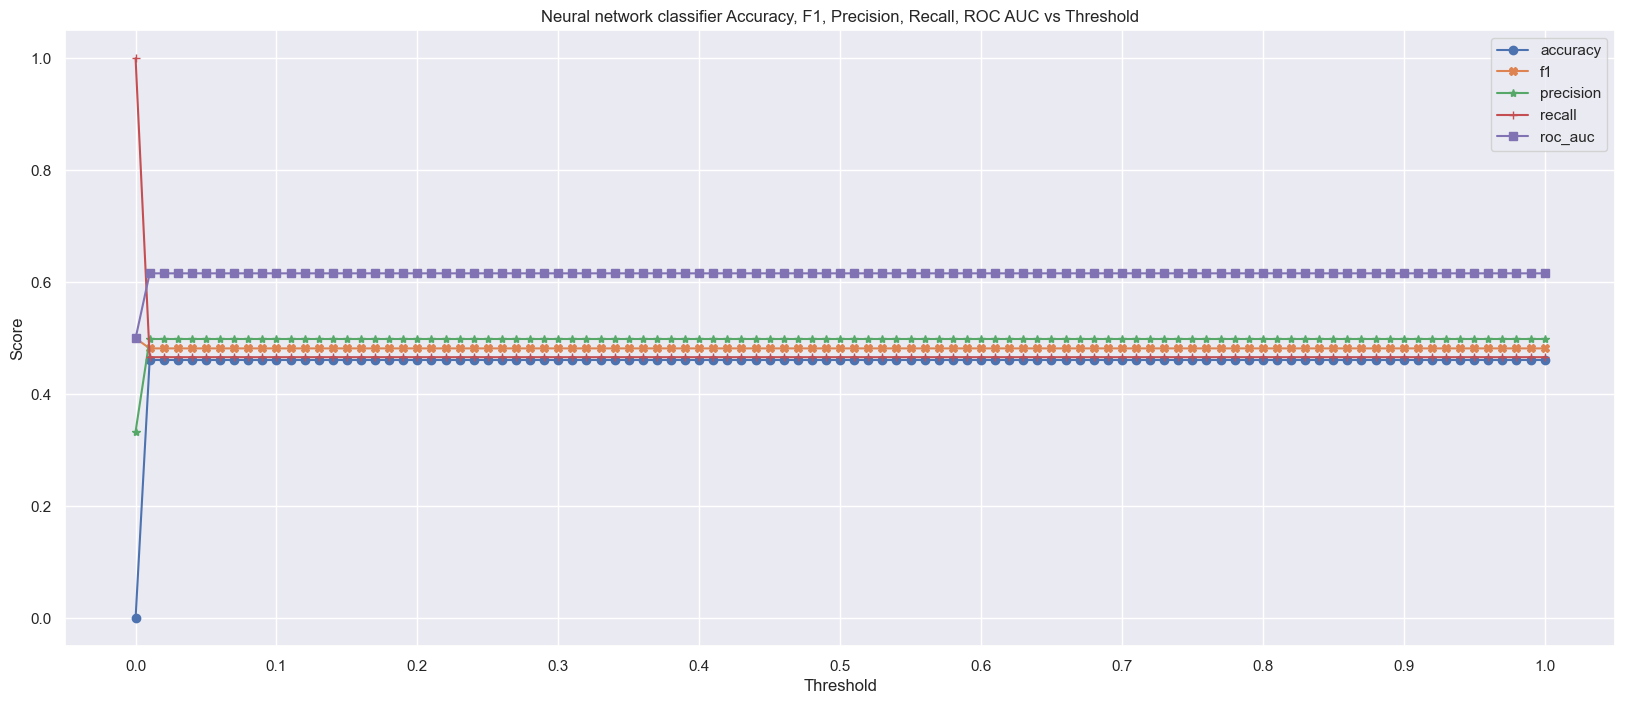

In [230]:
import matplotlib.pyplot as plt

# plot the scores
plt.figure(figsize=(20, 8))
plt.plot(nn_cf_result_df['Threshold'], nn_cf_result_df['Accuracy'], label='Accuracy',marker='o')
plt.plot(nn_cf_result_df['Threshold'], nn_cf_result_df['F1 score'], label='F1',marker='X')
plt.plot(nn_cf_result_df['Threshold'], nn_cf_result_df['Precision'], label='Precision',marker='*')
plt.plot(nn_cf_result_df['Threshold'], nn_cf_result_df['Recall'], label='Recall',marker='+')
plt.plot(nn_cf_result_df['Threshold'], nn_cf_result_df['ROC AUC'], label='ROC AUC',marker='s')
plt.legend(['accuracy', 'f1','precision','recall','roc_auc'])
plt.title('Neural network classifier Accuracy, F1, Precision, Recall, ROC AUC vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

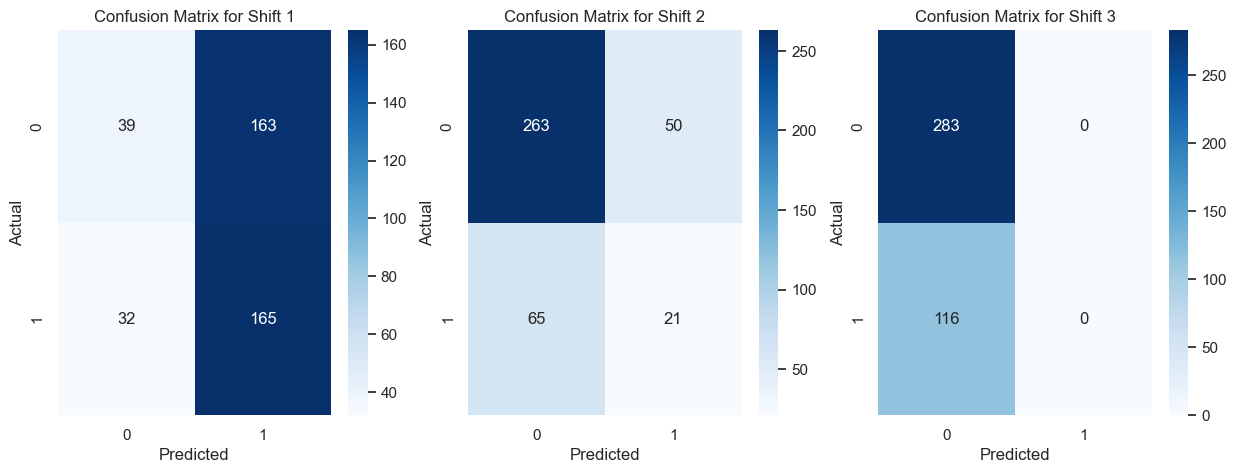

In [231]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
nn_cm = multilabel_confusion_matrix(y_test_shift, nn_cf_y_pred_test_shift>=0.5) 

# get the number of labels
num_labels = nn_cm.shape[0]

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(rf_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()


### Neual Network Classifier & Regressor multi output

In [151]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

def create_model(input_shape, num_classes, num_outputs):
    # Define the input layer
    input_layer = Input(shape=input_shape)

    # Define the shared base layer
    shared_layer = Dense(32, activation='relu')(input_layer)  # Dense layer with 32 units and ReLU activation

    # Define the classification output branch
    classification_output = Dense(num_classes, activation='softmax', name='classification_output')(shared_layer)  # Output layer for classification with 3 units and softmax activation

    # Define the regression output branch
    regression_output = Dense(num_outputs, activation='linear', name='regression_output')(shared_layer)  # Output layer for regression with 1 unit and linear activation

    # Combine the output branches
    outputs = [classification_output, regression_output]

    # Create the model
    model = Model(inputs=input_layer, outputs=outputs)

    # Compile the model with separate loss functions and metrics for classification and regression
    model.compile(optimizer='adam', 
                  loss={'classification_output': 'categorical_crossentropy', 'regression_output': 'mse'}, 
                  metrics={'classification_output': 'accuracy', 'regression_output': 'mse'})

    # Return the model
    return model

In [152]:
model = create_model(input_shape=x_train.shape[1:], num_classes=3, num_outputs=2)
model.summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 27)]         0           []                               
                                                                                                  
 dense_46 (Dense)               (None, 32)           896         ['input_43[0][0]']               
                                                                                                  
 classification_output (Dense)  (None, 3)            99          ['dense_46[0][0]']               
                                                                                                  
 regression_output (Dense)      (None, 2)            66          ['dense_46[0][0]']               
                                                                                           

In [153]:
# fit the model
snn_history = model.fit(x_train, [y_train_shift, y_train_location], epochs=1000, batch_size=8, verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=9)], validation_split=0.2)

Epoch 1/1000
94/94 [==============================] - 1s 8ms/step - loss: 1280.3673 - classification_output_loss: 0.8854 - regression_output_loss: 1279.4819 - classification_output_accuracy: 0.5718 - regression_output_mse: 1279.4819 - val_loss: 1206.1643 - val_classification_output_loss: 0.6904 - val_regression_output_loss: 1205.4739 - val_classification_output_accuracy: 0.7487 - val_regression_output_mse: 1205.4739
Epoch 2/1000
94/94 [==============================] - 0s 5ms/step - loss: 1080.0383 - classification_output_loss: 0.6971 - regression_output_loss: 1079.3411 - classification_output_accuracy: 0.6644 - regression_output_mse: 1079.3411 - val_loss: 927.2996 - val_classification_output_loss: 0.5990 - val_regression_output_loss: 926.7006 - val_classification_output_accuracy: 0.7487 - val_regression_output_mse: 926.7006
Epoch 3/1000
94/94 [==============================] - 0s 5ms/step - loss: 744.8813 - classification_output_loss: 0.6465 - regression_output_loss: 744.2348 - classi

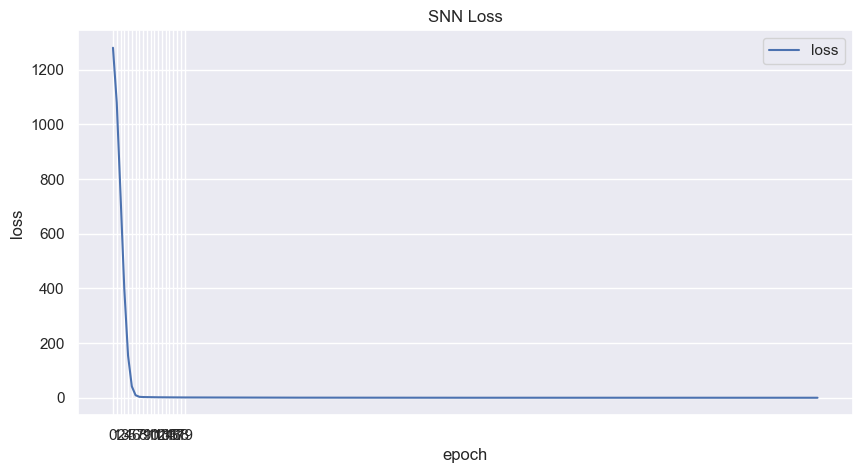

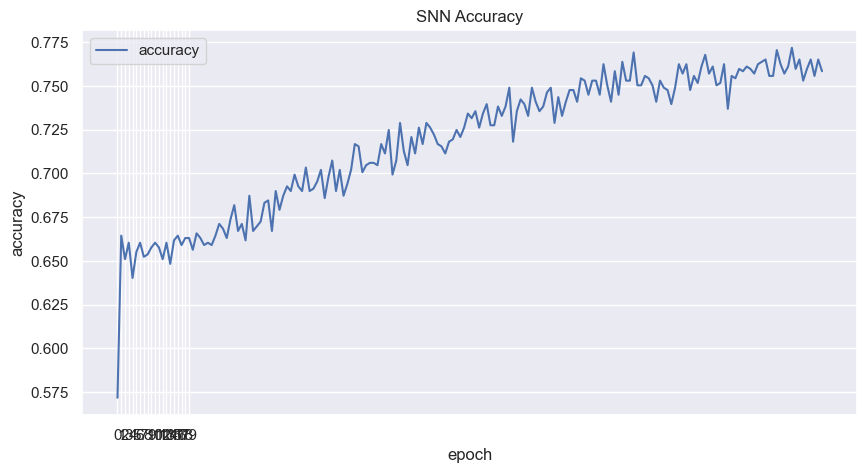

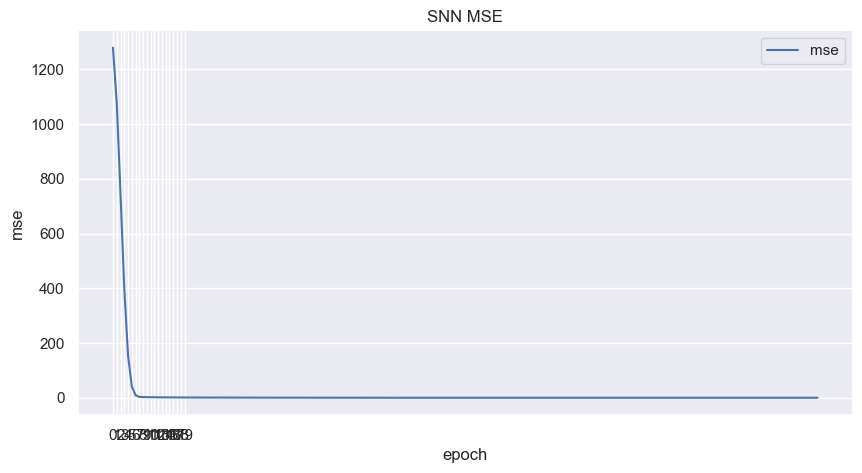

In [154]:
import matplotlib.pyplot as plt

# plot the loss
plt.figure(figsize=(10, 5))
plt.plot(snn_history.history['loss'], label='loss')
plt.legend(['loss', 'classification_output_loss','regression_output_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('SNN Loss')
plt.xticks(np.arange(0, 20, step=1))
plt.show()


# plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(snn_history.history['classification_output_accuracy'], label='accuracy')
plt.legend(['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('SNN Accuracy')
plt.xticks(np.arange(0, 20, step=1))
plt.show()

# plot the mse
plt.figure(figsize=(10, 5))
plt.plot(snn_history.history['regression_output_mse'], label='mse')
plt.legend(['mse'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('SNN MSE')
plt.xticks(np.arange(0, 20, step=1))
plt.show()

In [155]:
# make predictions
nn_cp_y_pred_train_shift, nn_cp_y_pred_train_location = model.predict(x_train)
nn_cp_y_pred_test_shift, nn_cp_y_pred_test_location = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [157]:
mae = mean_absolute_error(y_test_location, nn_cp_y_pred_test_location)
mse = mean_squared_error(y_test_location, nn_cp_y_pred_test_location)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  16.52028975612471
Mean Absolute Error:  1.5825338859476854


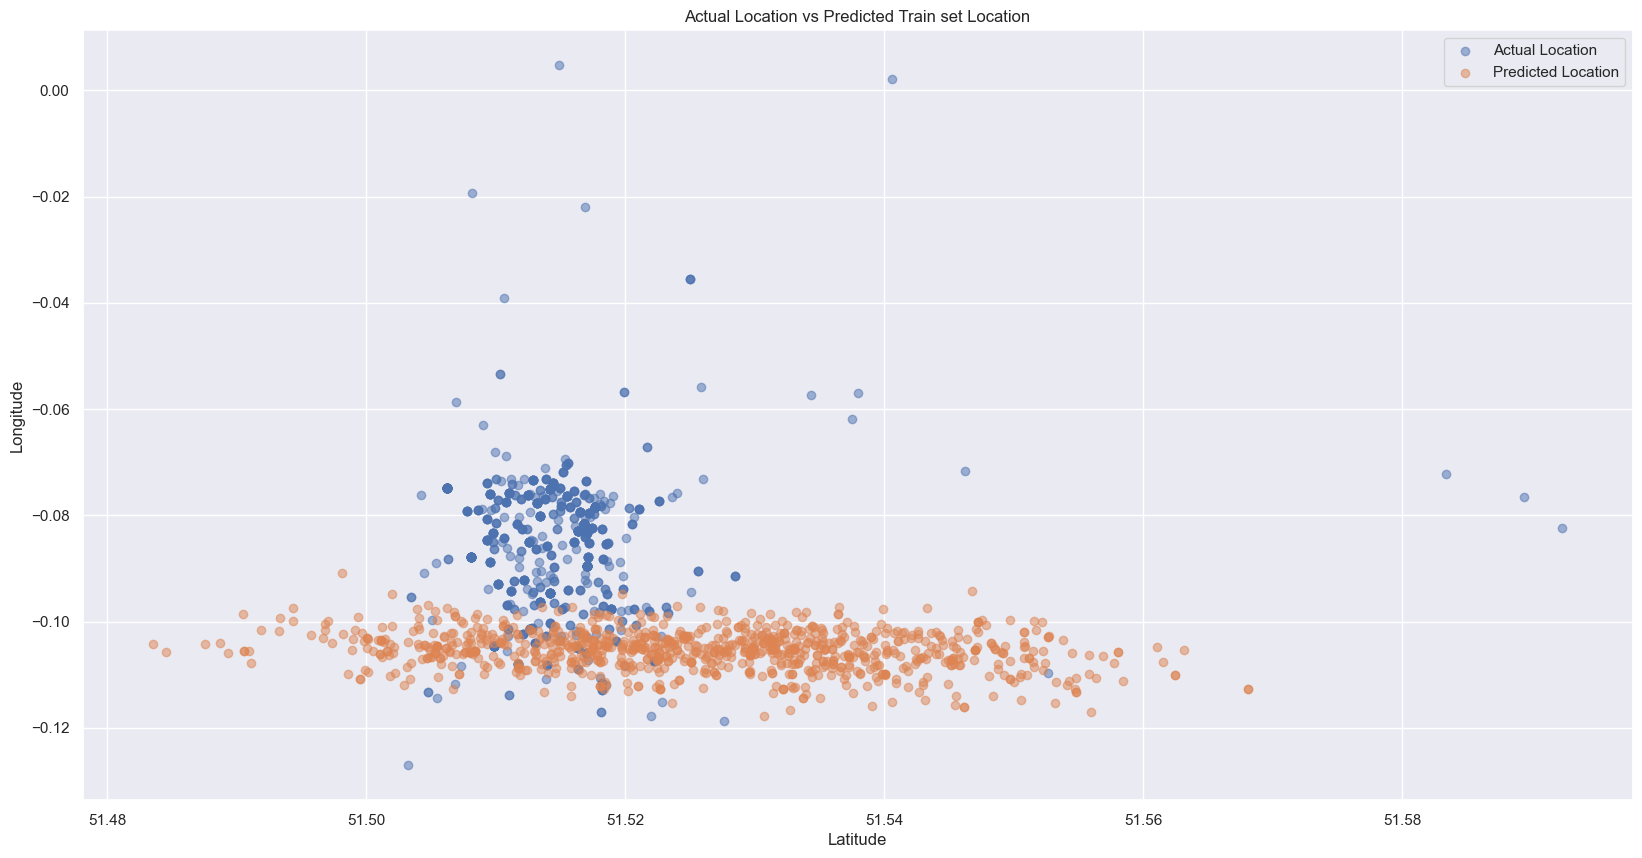

In [158]:
# Scatter plot 2d 
plt.figure(figsize=(20,10)) # set the size of the figure 
plt.scatter(x_train_original['Latitude'], x_train_original['Longitude'], label='Actual Location', alpha=0.5) # plot the actual train location
plt.scatter(nn_cp_y_pred_train_location[:,0], nn_cp_y_pred_train_location[:,1], label='Predicted Location', alpha=0.5) # plot the predicted location
plt.legend()
plt.title('Actual Location vs Predicted Train set Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

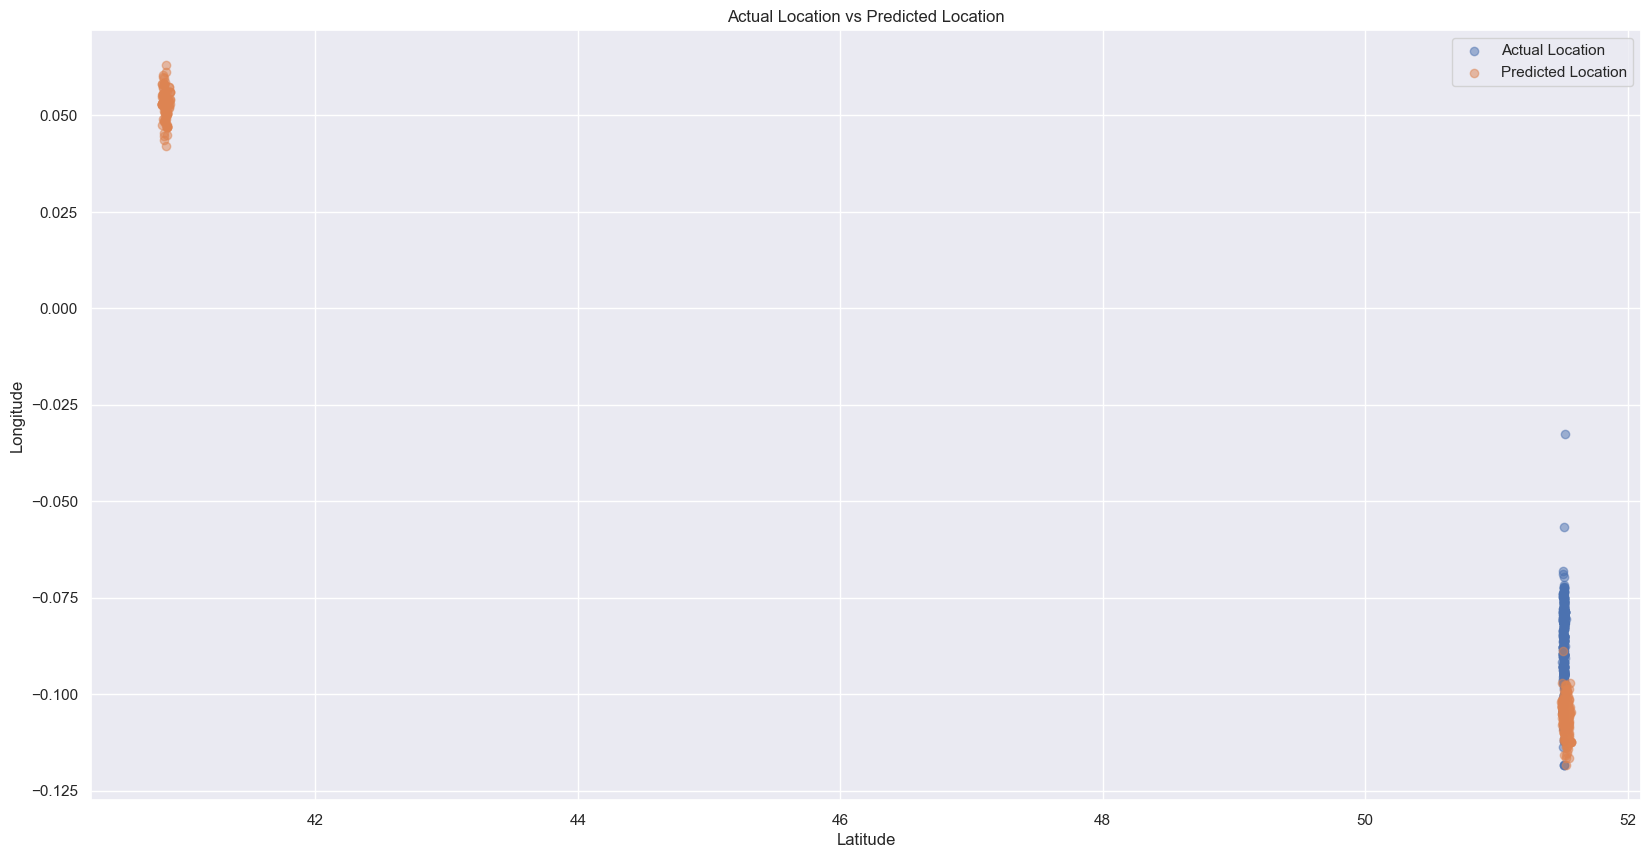

In [159]:
# Scatter plot 2d
plt.figure(figsize=(20,10))
plt.scatter(y_test_location['Latitude'], y_test_location['Longitude'], label='Actual Location', alpha=0.5)
plt.scatter(nn_cp_y_pred_test_location[:,0], nn_cp_y_pred_test_location[:,1], label='Predicted Location', alpha=0.5)
plt.legend()
plt.title('Actual Location vs Predicted Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [160]:
from geopy.distance import geodesic
nn_distance = []
for i in range(len(nn_cp_y_pred_test_location)):
    nn_distance.append(geodesic((nn_cp_y_pred_test_location[i][0], nn_cp_y_pred_test_location[i][1]), 
                             (y_test_location.iloc[i][0], y_test_location.iloc[i][1])).meters)
    
nn_distance = pd.DataFrame(nn_distance, columns=['distance'])

# print the distance
nn_distance.describe()

distance
count  3.990000e+02
mean   3.461963e+05
std    5.376443e+05
min    1.481420e+02
25%    1.826515e+03
50%    2.846810e+03
75%    1.183175e+06
max    1.188216e+06

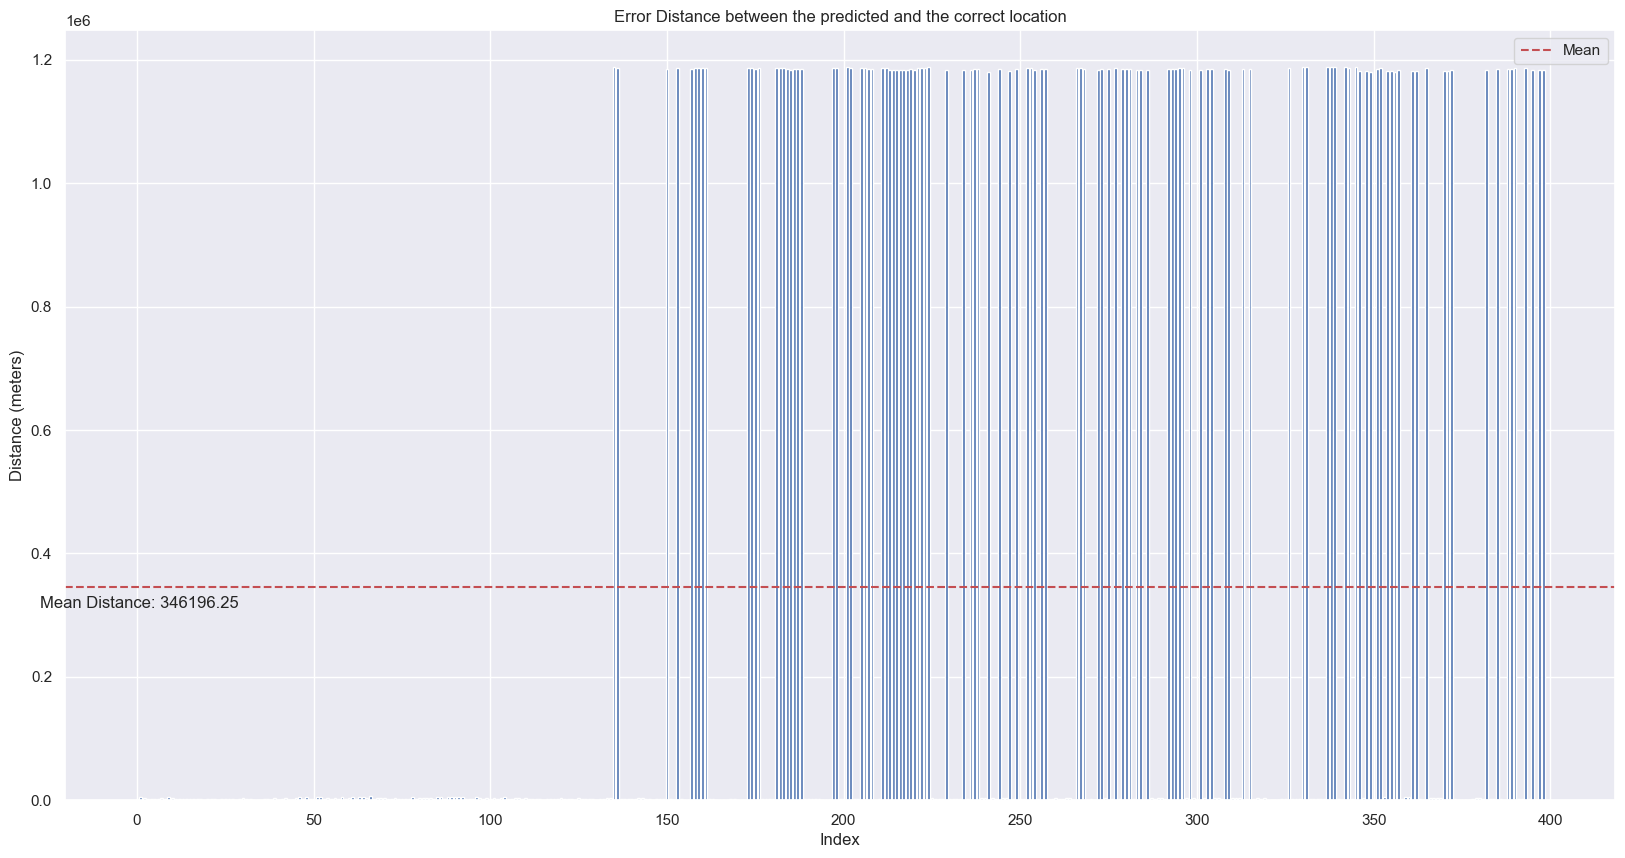

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # set the size of the figure

# plot the actual test location
plt.bar(nn_distance.index, nn_distance['distance'])

# plot the predicted location
plt.axhline(nn_distance['distance'].mean(), color='r', linestyle='--', label='Mean')

# add legend
plt.legend()

# add title and labels
plt.title('Error Distance between the predicted and the correct location')
plt.xlabel('Index')
plt.ylabel('Distance (meters)')

# add mean distance text annotation
plt.text(0.5, 0.9*nn_distance['distance'].mean(), f'Mean Distance: {nn_distance["distance"].mean():.2f}', ha='center')

plt.show()

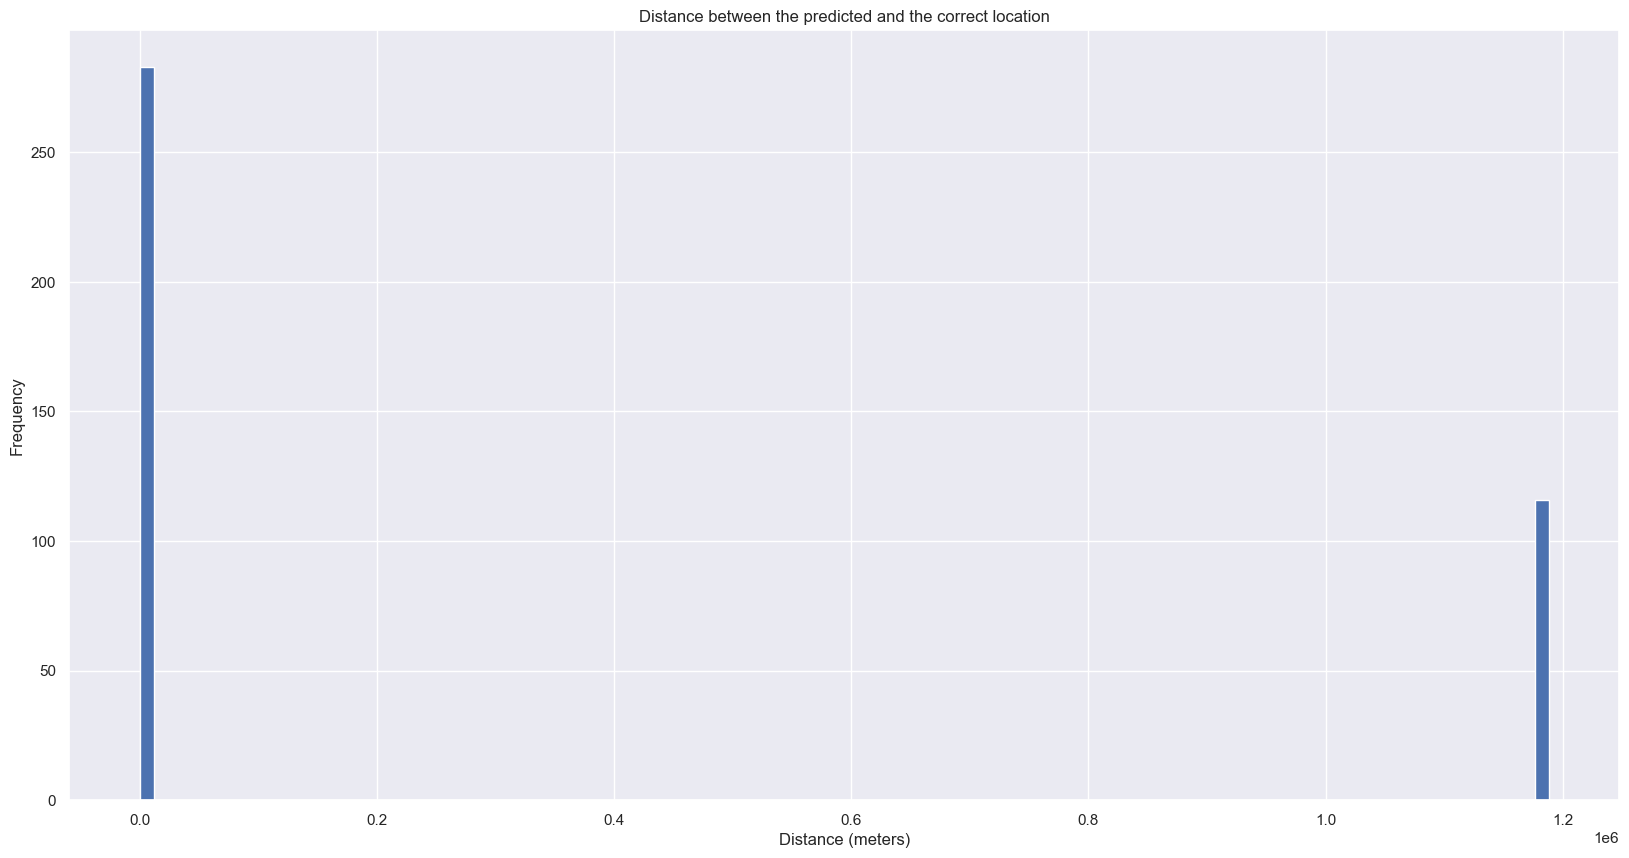

In [163]:
# histogram of the distance error
plt.figure(figsize=(20,10))
plt.hist(nn_distance['distance'], bins=100)
plt.title('Distance between the predicted and the correct location')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

##### Classification analysis

In [174]:
result_df1 = evaluate_thresholds(y_test_shift, nn_cp_y_pred_test_shift, multi_class='ovo')
print(result_df1)

     Threshold  Accuracy  F1 score  Precision    Recall   ROC AUC
0         0.00  0.000000  0.500000   0.333333  1.000000  0.500000
1         0.01  0.002506  0.474832   0.356873  0.709273  0.535088
2         0.02  0.012531  0.475949   0.358779  0.706767  0.537594
3         0.03  0.025063  0.474894   0.359536  0.699248  0.538221
4         0.04  0.032581  0.478149   0.363281  0.699248  0.543233
..         ...       ...       ...        ...       ...       ...
96        0.96  0.032581  0.060606   0.433333  0.032581  0.505639
97        0.97  0.025063  0.047506   0.454545  0.025063  0.505013
98        0.98  0.012531  0.024331   0.416667  0.012531  0.501880
99        0.99  0.002506  0.004950   0.200000  0.002506  0.498747
100       1.00  0.000000  0.000000   0.000000  0.000000  0.500000

[101 rows x 6 columns]


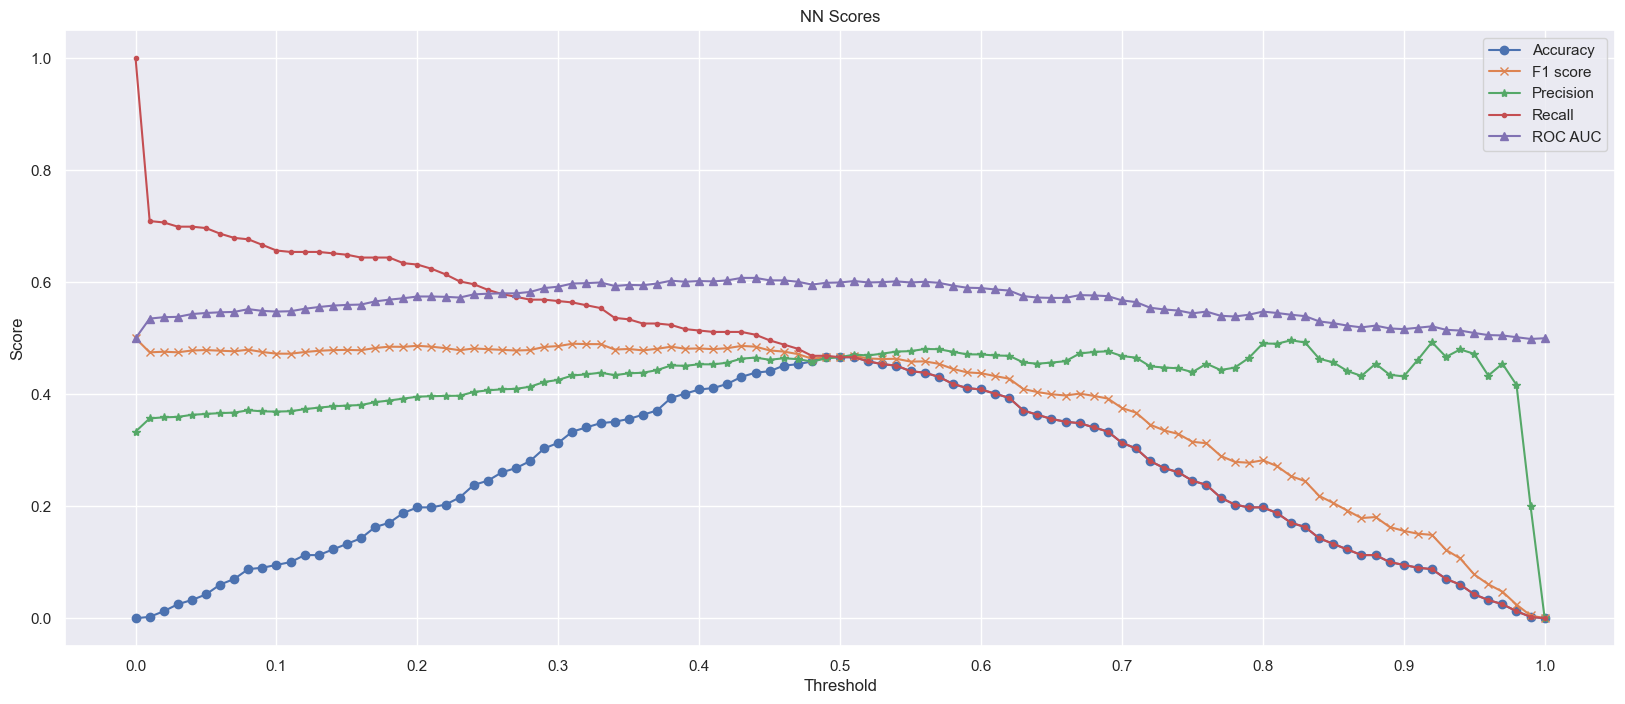

In [175]:
import matplotlib.pyplot as plt

# plot the scores
plt.figure(figsize=(20, 8))
plt.plot(result_df1['Threshold'], result_df1['Accuracy'], label='Accuracy',marker='o')
plt.plot(result_df1['Threshold'], result_df1['F1 score'], label='F1 score',marker='x')
plt.plot(result_df1['Threshold'], result_df1['Precision'], label='Precision',marker='*')
plt.plot(result_df1['Threshold'], result_df1['Recall'], label='Recall',marker='.')
plt.plot(result_df1['Threshold'], result_df1['ROC AUC'], label='ROC AUC',marker='^')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('NN Scores')
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

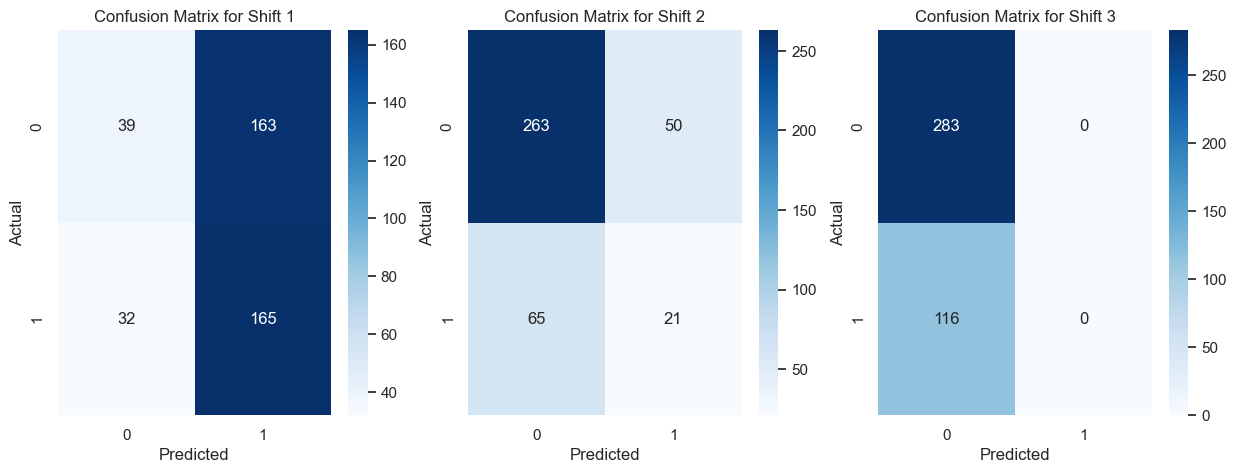

In [176]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# multilabel confusion matrix
rf_cm = multilabel_confusion_matrix(y_test_shift, nn_cp_y_pred_test_shift>=0.5)

# get the number of labels
num_labels = rf_cm.shape[0]

# create a single figure with multiple subplots arranged in a row
fig, axes = plt.subplots(1, num_labels, figsize=(num_labels*5, 5))

# plot the confusion matrix for each label
for label_idx in range(num_labels):
    sns.heatmap(rf_cm[label_idx], annot=True, fmt='d', cmap='Blues', ax=axes[label_idx])
    axes[label_idx].set_title(f'Confusion Matrix for Shift {label_idx + 1}')
    axes[label_idx].set_xlabel('Predicted')
    axes[label_idx].set_ylabel('Actual')

plt.show()